In [68]:
%pip install py65emu numpy


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [69]:
""" NES hardware extended pallete """
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(*rgb)

def load_palette(pal_file):
    with open(pal_file, 'rb') as f:
        palette_data = f.read()
    palette = []
    for i in range(0, len(palette_data), 3):
        r = palette_data[i]
        g = palette_data[i + 1]
        b = palette_data[i + 2]
        palette.append((r, g, b))
    return palette

nes_palette = load_palette('2C02G_wiki.pal')
nes_palette

[(98, 98, 98),
 (0, 31, 178),
 (36, 4, 200),
 (82, 0, 178),
 (115, 0, 118),
 (128, 0, 36),
 (115, 11, 0),
 (82, 40, 0),
 (36, 68, 0),
 (0, 87, 0),
 (0, 92, 0),
 (0, 83, 36),
 (0, 60, 118),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (171, 171, 171),
 (13, 87, 255),
 (75, 48, 255),
 (138, 19, 255),
 (188, 8, 214),
 (210, 18, 105),
 (199, 46, 0),
 (157, 84, 0),
 (96, 123, 0),
 (32, 152, 0),
 (0, 163, 0),
 (0, 153, 66),
 (0, 125, 180),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (255, 255, 255),
 (83, 174, 255),
 (144, 133, 255),
 (211, 101, 255),
 (255, 87, 255),
 (255, 93, 207),
 (255, 119, 87),
 (250, 158, 0),
 (189, 199, 0),
 (122, 231, 0),
 (67, 246, 17),
 (38, 239, 126),
 (44, 213, 246),
 (78, 78, 78),
 (0, 0, 0),
 (0, 0, 0),
 (255, 255, 255),
 (182, 225, 255),
 (206, 209, 255),
 (233, 195, 255),
 (255, 188, 255),
 (255, 189, 244),
 (255, 198, 195),
 (255, 213, 154),
 (233, 230, 129),
 (206, 244, 129),
 (182, 251, 154),
 (169, 250, 195),
 (169, 240, 244),
 (184, 184, 184),
 (0, 0, 0),
 (0, 0, 0),

In [70]:
""" Super Mario Bros. (World).nes ROM data """

"""
https://6502disassembly.com/nes-smb/SuperMarioBros.html

"""

rom_data = '4e45531a02010100000000000000000078d8a9108d0020a2ff9aad022010fbad022010fba0fea205bdd707c90ab00cca10f6adff07c9a5d002a0d620cc908d11408d7007a9a58dff078da707a90f8d1540a9068d012020208220198eee7407ad7807098020ed8e4c578001a4c8ec100041414c343c4454687ca8bfdeef038c8c8c8d0303038d8d8d8d8d8d8d8d8d8d8d0040ad7807297f8d7807297e8d0020ad790729e6ac7407d005ad7907091e8d790729e78d0120ae0220a90020e68e8d0320a9028d1440ae7307bd5a808500bd6d80850120dd8ea000ae7307e006d001c8be8080a9009d00039d01038d7307ad79078d012020d0f2205c8e20828120978fad76074ab025ad4707f005ce4707d019a214ce7f071007a9148d7f07a223bd8007f003de8007ca10f5e609a200a007ada70729028500ada8072902450018f001387ea707e888d0f9ad2207f01fad02202940d0f9ad76074ab00620238220c681ad02202940f0f9a01488d0fdad3f078d0520ad40078d0520ad7807488d0020ad76074ab003201282ad02206809808d002040ad7007c902f00bc901d038ad7207c903d031ad7707f004ce770760adfc062910f019ad76072980d01aa92b8d7707ad7607a8c884fa49010980d005ad7607297f8d760760ac4e07a9288500a20ebde406c500900face0061879e10690031865009de406ca10e7aee006e8e003d002a2008ee006a208a002b9e9069df1061869089df2061869089df306cacaca8810e860ad700720048e3182dcae8b831892a0002ca004a9f8990002c8c8c8c8d0f760ad720720048ecf8f678561904582042073010000a000adfc060dfd06c910f004c990d0034cd882c920f01aaea207d00b8d8007206b83b0604cc082aefc07f04ac940d046c8ada207f04ea9188da207ad8007d036a9108d8007c001f00ead7a0749018d7a072025834cbb82ae6b07e88a29078d6b07200e83bd3f829d0003e8e00630f5ac5f07c88c0403a9008dfc0620eaaea50ec906d044a9008d70078d72078d2207ee740760aca207f0ec0a9006adfd07200e8320039cee5d07ee6407ee5707ee7007adfc078d6a07a9008d72078da207a217a9009ddd07ca10fa608d5f078d6607a2008e60078e67076007224983ce242400a007b91d839900038810f7ad7a07f00aa9248d0403a9ce8d0603600180028141800142c2028041c141c101c1010280009b1018052c2024155a1020283020108020303001ff00ae1707ad1807d00de8ee170738bd54838d1807f00abd3f838dfc06ce1807186020a083ad7207f007a20086082047c0202af14ce9eead720720048eeccfb083bd83f6836184ae1b07e88634a90885fc4c4e87a0008435a56dc534d006a586c960b003e635c89820e6b0ad1a07c534f016ad68071869808d6807a9016900a820c4af206fafe635a535f06860ad4907d048ad1907f018c909b03fac5f07c007d009c9039034e9014c1884c902902ba8d008ad5307f014c8d011c8ad5f07c907f00988c004b026c003b00fc003d004a90485fc9818690c8d7307ad49071869048d4907ad190769008d1907c9079008a9068da107ee720760ada107d020ac5f07c007b01aa9008d60078d5c078d7207ee5f0720039cee5707a9018d700760adfc060dfd062940f00da9018dfc07a9ff8d5a0720489260fffff6fbf7fbf8fbf9fbfafbf650f750f850f950fa50fdfeff4142444548313234353800bd1001f0bec90b9005a90b9d1001a8bd2c01d0049d100160de2c01c92bd01ec00bd007ee5a07a94085feb9b7844a4a4a4aaab9b784290f9d34012027bcbce506b516c912f022c90df01ec905f012c90af016c90bf012c909b006b51ec902b008aeee03bcec06a608bd1e01c9189005e9019d1e01bd1e01e90820c1e5bd1701990302186908990702a902990202990602bd10010aaabd9f84990102bda084990502a60860ad3c0720048e8b859b8552865a8693869d88a8869d88e686bf85e3854386ff863287498720208220198ead7007f032a2034cc585ad440748ad560748a9008d5607a9028d440720f185688d5607688d44074c458701020304ac4e07bebb858e73074c458700090a0422220f0f0f220f0f221627182230271922372716ac4407f006b9c7858d7307ee3c07ae0003a000ad5307f002a004ad5607c902d002a008a9038500b9d7859d0403c8e8c60010f4ae0003ac4407d003ac4e07b9cf859d0403a93f9d0103a9109d0203a9049d0303a9009d08038a1869078d000360ad3307c901d005a90b8d73074c4587a9002008884c45872030bcae0003a9209d0103a9739d0203a9039d0303ac5f07c8989d0403a9289d0503ac5c07c8989d0603a9009d07038a1869068d00034c4587ad5907f00aa9008d5907a9024cc786ee3c074c4587ad7007f033c903f022ad5207d02aac4e07c003f005ad6907d01e20a4efa90120088820a588a9008d740760a9128da007a9032008884c4e87a9088d3c0760ee740720b092ad1f07d0f8ce1e071003ee3c07a9068d730760ad7007d04aa91e8d0620a9c08d0620a9038501a0008400ad0720ad07209100c8d002e601a501c904d0f0c03a90eca9054c4c86ad7007d017a2009d00039d0004cad0f7202583ee3c0760a9fa2036bcee720760204305160a1b121820520b20181b150d24241d12160e2068050024242e2923c07faa23c201eaff21cd0724242924242424214b0920181b150d24242824220c472423dc01baff21cd05160a1b1218220c071d12160e241e19ff21cd05160a1b1218220b09100a160e24181f0e1bff258415200e150c18160e241d1824200a1b19242318170e2b26250124262d01242635012427d946aa27e145aaff151e12101204030200240524000807060000002727464e59616e6e480aa8c004900cc0089002a008ad7a07d001c8befe87a000bd5287c9fff007990103e8c8d0f2a90099010368aac904b049cad023ad5a07186901c90a9007e90aa09f8c08038d0903ac5f07c88c1403ac5c07c88c160360ad7a07f01dad5307cad009ac7007c003f00249014a900ba004b9ed879904038810f760e9040a0aaaa000bdf287991c03e8c8c8c8c8c00c90f1a92c4c3f86ada007d00b202082a9078da007ee3c0760ad260729018505ac40038400ad2107994203ad2007994103a99a994303a9008504aa8601bda10629c085030a2a2aa8b9088b8506b90c8b8507bda1060a0a8502ad1f07290149010a6502a8a600b1069d4403c8b1069d4503a404a505d00ea5014ab0192603260326034c3089a5014ab00f46034603460346034c308946034603e604b9f903050399f903e600e600a601e8e00d908da400c8c8c8a9009941038c4003ee2107ad2107291fd00da9808d2107ad200749048d20074cbd89ad2107291f38e904291f8501ad2007b0024904290409238500a5014a4a69c08501a200ac4003a500994103a5011869089942038501bdf903994403a9019943034a9df903c8c8c8c8e8e00790d99941038c4003a9068d7307602727271707173f0c04ffffffff000f07120f0f07170f0f07171c0f071700a5092907d051ae0003e031b04aa8b9c9899d0103e8c8c00890f4ae0003a9038500ad4e070a0aa8b9d1899d0403c8e8c60010f4ae0003acd406b9c3899d0503ad00031869078d0003eed406add406c9069005a9008dd4066045454747474747475758595a2424242426262626a041a903ae4e07d002a90420978aa9068d730760206d8aeef003deec0360a900a003c900f014a000c958f00ec951f00ac8c95df005c952f001c898ac0003c820978a889818690a4c3f86860084010a0aaaa020a506c9d09002a0248403290f0a8504a9008505a5021869200a26050a260565048504a50569001865038505a401bd398a990303bd3a8a990403bd3b8a990803bd3c8a990903a504990103186920990603a505990003990503a902990203990703a900990a03a6006010ac648c8b8b8c8c242424242727272724242435362537252438242424303026262634262431243233262433342626262626262624c024c0247f7f24b8bab9bbb8bcb9bdbabcbbbd606461656266636760646165626663676868696926266a6a4b4c4d4e4d4f4d4f4d4e50516b702c2d6c716d726e736f74868a878b888c888c898d69698e918f922693269390946969a4e9eaeb24242424242f243da2a2a3a324242424a2a2a3a39924992424a23e3f5b5c24a3242424249d479e47474727274747474727274747a947aa479b279c27272727275252525280a081a1bebebfbf75ba76bbbababbbb454745474747474745474547b4b6b5b7454745474547454745474547454745474547454747474747474747474747474747474747474747472424242424242424abacadae5d5e5d5ec124c124c6c8c7c9cacccbcd2a2a404024242424244724478283848524472447868a878b8e918f92242f243d242424353625372524382424242439243a243b243c2424244126412626262626b0b1b2b3777977795355545653555456a5a7a6a8c2c4c3c55759585a7b7d7c7e3f00200f1512250f3a1a0f0f30120f0f27120f221627180f1030270f1630270f0f3010003f00200f291a0f0f36170f0f30210f0f27170f0f1627180f1a30270f1630270f0f3617003f00200f291a090f3c1c0f0f30211c0f27171c0f1627180f1c36170f1630270f0c3c1c003f00200f3010000f3010000f3016000f2717000f1627180f1c36170f1630270f003010003f000422300010003f00040f300010003f00042227160f003f14040f1a3027002548101d110a17142422181e24160a1b12182b002548101d110a17142422181e24151e1210122b0025c5160b1e1d24181e1b24191b12170c0e1c1c24121c24121726050f0a17181d110e1b240c0a1c1d150e2b0025a71322181e1b241a1e0e1c1d24121c24181f0e1baf0025e31b200e24191b0e1c0e171d2422181e240a24170e20241a1e0e1c1daf00264a0d191e1c11240b1e1d1d1817240b002688111d18241c0e150e0c1d240a2420181b150d000aa8688504688505c8b1048506c8b10485076c0600ad0220ad7807091029f020ed8ea924202d8ea9208d0620a9008d0620a204a0c0a9248d072088d0facad0f7a0408a8d00038d01038d072088d0fa8d3f078d40074ce68ea9018d16404aaa8d1640206a8ee8a00848bd164085004a05004a682a88d0f19dfc064829303d4a07f0076829cf9dfc0660689d4a07608d0620c8b1008d0620c8b1000a48ad78070904b00229fb20ed8e680a90030902c84a4aaab001c8b1008d0720cad0f5389865008500a90065018501a93f8d0620a9008d06208d06208d0620ae0220a000b100d0ac8d05208d0520608d00208d780760f006620662066d026d027a03060c12181e24850020118fa5004a4a4a4a186901290fc906b044480aa8ae0003a920c000d002a9229d0103b9f48e9d0203b9f58e9d03038503860268aabd008f38f9f58ea8a602b9d7079d0403e8c8c603d0f4a9009d0403e8e8e88e000360ad7007c900f016a205bd34011879d7073016c90ab01999d70788ca10eca900a2069d3301ca10fa60de3301a909d0e738e90afe33014c758fa205209e8fa20ba00538bddd07f9d707ca8810f6900ee8c8bddd0799d707e8c8c00690f460043048607890a8c0d8e824f8fc282c18ff2358a06f20cc90a01f99b0078810faa9188da20720039ca04b20cc90a221a9009d8007ca10faad5b07ac5207f003ad51078d1a078d25078d28072038b0a0202901f002a0248c2007a0808c21070a0a0a0a8da006ce3007ce3107ce3207a90b8d1e0720229cad6a07d010ad5f07c904900cd007ad5c07c9029003eecc06ad5b07f005a9028d1007a98085fba9018d7407ee720760a9018d57078d5407a9028d5a078d6107a9008d7407a8990003c8d0fa8d59078d69078d2807a9ff8da003ad1a074e780729016a2e780720ed90a9388de306a9488de206a9588de106a20ebdbc8f9de406ca10f7a003b9cb8f9900028810f720af9220aa92ee2207ee720760a207a90085068607e001d004c060b002910688c0ffd0f1ca10ec60020104081020ad7007f023ad5207c902f00da005ad1007c906f00ec907f00aac4e07ad4307f002a004b9e79085fb602818382808000020b0500000b0b0f0002000000000000020040302ad1a07856da9288d0a07a901853385b5a900851dce9004a0008c5b07ad4e07d001c88c0407ae1007ac5207f007c001f003be1891b916918586bd1c9185cebd25918dc40320f185ac1507f01aad5707f015b92d918df807a9018dfa074a8df9078d57078d9f07ac5807f014a903851da2002084bda9f085d7a205a000201eb9ac4e07d003200bb7a907850e6056406570664066406640666065700000ee7407a9008d2207a98085fcce5a07100ba9008d7207a9038d700760ad5f070aaaad5c072902f001e8bcbd91ad5c074a98b0044a4a4a4a290fcd1a07f0049002a9008d5b072082924c6492ad720720048e249267853792a9008d3c078d2207a90285fcee7407ee720760a9008d7407adfc062910d005ada007d039a98085fc2082929013ad5f078dfd07a9000a8d72078da0078d70076020039ca9018d5407ee5707a9008d47078d5607850e8d7207a9018d70076038ad7a07f021ad6107301cad530749018d5307a206bd5a0748bd61079d5a07689d6107ca10ef1860a9ff8dc90660ac1f07d005a0088c1f07889820c892ce1f07d003206a896020048edb92ae88ae88fc93db92ae88ae88fc93ee2607ad2607290fd0068d2607ee2507eea006ada006291f8da006600030609300001112121300005152530000000000000102020300000000000091929300000000515253414243000000000091929787888999000000111213a4a5a5a5a697989901020300a4a5a6001112121213000000000102020300a4a5a5a600000011121213000000000000009c008baaaaaaaa1112138b009c9c00000102031112121300000000aaaa9caa008b0001020380830081840082850002000003000004000000050607060a0008094d00000d0f4e0e4e4e000d1a8687878787878787878787696900000000004547474747470000000000000000000000000086876954526200000018011807180f18ff18011f071f0f1f811f01008f1ff11ff918f118ff1fad2807f003200895a20ca9009da106ca10faac4207f042ad2507c903300538e90310f70a0a0a0a79f6926d2607aabdfa92f02648290f38e90185000a6500aa684a4a4a4aa8a9038500bd8a9399a106e8c8c00bf004c600d0f0ae4107f013bcad93a200b9b193f0039da106c8e8e00dd0f2ac4e07d00cad5f07c907d005a9624c8894b9d893ac4307f002a9888507a200ad27070aa8b9dc938500c88401ad4307f00ae000f006a50029088500a000b98ac62400f005a5079da106e8e00df018ad4e07c902d008e00bd004a9548507c8c008d0dba401d0be200895ada00620e19ba200a0008400bda10629c00a2a2aa8bda106d90495b002a900a400910698186910a8e8e00d90dd60105188c0a2028608a9008d2907ac2c07b1e7c9fdf04bbd30071046c8b1e70a900bad2b07d006ee2b07ee2a0788b1e7290fc90dd01bc8b1e7882940d01cad2b07d017c8b1e7291f8d2a07ee2b074c6e95c90ed005ad2807d008ad2a07cd250790062095954c7195ee2907208995a608bd30073003de3007ca108cad2907d085ad2807d08060ee2c07ee2c07a9008d2b0760bd30073003bc2d07a210b1e7c9fdf0e3290fc90ff008a208c90cf002a2008607a608c90ed008a9008507a92ed053c90dd01ba9228507c8b1e72940f063b1e7297fc94bd003ee4507293f4c1696c90cb027c8b1e72970d00ba9168507b1e7290f4c16968500c970d00ab1e72908f004a9008500a5004c1296c8b1e729704a4a4a4a8500bd30071042ad2a07cd2507f011ac2c07b1e7290fc90ed005ad2807d02160ad2807f00ba9008d28078d2907850860ac2c07b1e729f04a4a4a4acd2607d0dfad2c079d2d07208995a50018650720048ee59840972e9a3e9af299509a599ae598419bba9779997c997f99579968996b99d099d7990698b79aab9894990e9b0e9b0e9b019b199b199b199b149b199b6f98199ad39a82989e99099a0e9a019af2960d970d972b972b972b974596c596bc2d07c8b1e7482940d0126848290f8d27076829304a4a4a4a8d420760682907c90490058d4407a9008d410760a204ad5f07f008e8ac4e0788d001e88a8dd606200888a90d201697ad230749018d2307608500a900a204b416c400d002950fca10f560141718a600bd2097a005883007d91600d0f8a9008dcd0660ad330720048e4c977897699a20bb9bbd3007f01f1011989d3007ad25070d2607f005a9164cb097a607a9179da106a94c4caa97a9184cb09720ac9b8406900cbd30074a9d3607a9194cb097a91bbc3007f01ebd36078506a607a91a9da106c406d02ce8a94f9da106a950e8a00f4c7d9ba607a0004c7d9b42414320ac9ba000b007c8bd3007d001c8b9b7978da1066000454545000048474600454949494547474a474747474b47474949494949474a474a47474b474b4747474747474a474a474a4b474b474b20bb9b8407a00420af9b8a48bc3007a607a90b8506b9cf979da106e8a506f007c8c8c8c8c8c606e00bd0ea68aaad2507f036bd3007c901f02aa407d004c903f022c902d02320cb9b48204a99689587ad2507956ea90195b6950fa99095cfa931951660a0528cab066020bb9bbc3007a607a96b9da106a96c9da20660a00320af9ba00a20b398b010a206a9009da106ca10f8b9dd988da8066015140000151e1d1c1521201fa00320af9b20bb9b88888405bc30078406a605e8b99f98c900f008a200a405207d9b18a406b9a3989da106b9a7989da206601110151413121514203999a500f004c8c8c8c89848ad60070d5f07f02bbc3007f026204a99b02120cb9b1869089587ad25076900956ea90195b6950f20d39b95cfa90d95162087c768a8a607b9dd989da106e8b9df98a406884c7d9ba00120af9b20bb9b9829078506bc300760a20018b50ff005e8e005d0f66020ac9ba9868dab06a20ba001a9874c7d9ba9032ca9074820ac9b68aaa9c09da10660a9062ca9072ca9094820ac9b68aaa90b9da106e8a000a9634c7d9b20bb9ba202a96d4c7d9ba9248da106a201a008a925207d9ba9618dab0620cb9b38e908858cad2507e9008573a93085d4a9b08d0d01a930851be61460a200a00f4ce9998a48a201a00fa944207d9b68aa20bb9ba201a9404c7d9bc3c2c2c2ac4e07b9ee994c449a060708c50c89a00c20af9b4c0e9aa9088d7307a400bef999b9fc994c209a20bb9ba607a9c4a0004c7d9b696161622251525288ac4e07ad4307f002a004b9299a4c449aac4e07b9259a4820ac9ba607a000684c7d9bac4e07b9299a4c5f9aac4e07b9259a4820bb9b68a6074c7d9b20bb9ba607a9649da106e888300ea9659da106e8883005a966207d9bae6a0420d39b9d7704ad25079d6b0420cb9b9d7104e8e0069002a2008e6a046007070605040302010003030405060708090a20ac9b9005a9098d3407ce3407ac3407beae9ab9a59aa8a9614c7d9b20bb9b204a9920cb9b9587ad2507956e20d39b95cf9558a9329516a00194b6f60fa607a9679da106a9689da20660ad5d07f036a9008d5d074c199b20369b4c2c9ba9008dbc0620369b8407a900ac4e0788f002a905186507a8b9e8bd4820bb9b4c489aa50038e900a8608700000020ac9b902dad4e07d028ae6a0420cb9b38e9109d7104ad2507e9009d6b04c8c8980a0a0a0a9d7704e8e0059002a2008e6a04ae4e07bd3d9ba208a00f8c3507bca106f018c017f017c01af013c0c0f00cc0c0b00bc054d004c950f0039da106e8e00db006ac35078810d26020bb9bbd3007181005989d30073860bc2d07b1e7290f8507c8b1e7290fa860ad26070a0a0a0a60a5070a0a0a0a1869206000d00505484a4a4a4aa8b9df9b850768290f1879dd9b850660ffff12360e0e0e3232320a264020139c8d500729600a2a2a2a8d4e0760ac5f07b9b49c186d6007a8b9bc9c60ad500720099ca8ad5007291f8d4f07b9e09c186d4f07a8b9e49c85e9b9069d85eaac4e07b9289d186d4f07a8b92c9d85e7b94e9d85e8a000b1e7482907c90490058d4407a9008d4107684829384a4a4a8d10076829c0182a2a2a8d1507c8b1e748290f8d2707684829304a4a4a4a8d42076829c0182a2a2ac903d0058d4307a9008d3307a5e718690285e7a5e8690085e86000050a0e13171b202529c026602829012762243520632229412c612a3126622e232d603329012764303221651f061c007097b0df0a1f597e9ba9d0011f3c517b7ca0a9cef1fafb35608eaab3d8053360719b9d9d9d9d9e9e9e9e9e9e9e9f9f9f9f9f9f9f9f9f9f9f9fa0a0a0a0a0a0a1a1a1a1a10003191c0645c06bce378a198ef348cd323b7a8ff65bceff92057ed70235d879af108f026ffaaeaeaea4a4a5a5a6a6a6a7a7a8a8a8a8a8a9a9a9aaabababacacacada1a2a2a3a3a376ddbb4cea1d1bcc565d169dc61d369dc91d04db491d841bc95d88950f08304c782da62890b5ff0f03561bc91b0f07361baa1b48950f0a2a1b5b0c782d90b5ff0b8c4b4c775feb0cbddb199d751d7d5bd91d3ddd991d269d5a2b8a2cca1b20957b5cdb4c1bcc3bcc782da62890b5ff0b8c3b1d8b1dab0cdb1d0f03651d6b1b059d0b1b059b0b1d8b0c1b8c70157b0cdb0c0f08782da62890b5ff27a94b0c68290f06771b0f0b60154b8c782d90b5ff0f038e65e1bb386da83ee5e70f080b022b025e65e1bb0edb0ebb8edb0efe65ec0f0d4e65e10f0e4e02e00f10fee5e11b857b0c5b95782d90b5ffa586e42818a845836903c6299b8316a48824e92805a87b28248fc803e80346a88524c824ffeb8e0f03fb051785db8e0f0757057b059b802b85fb050f0b1b059b05ff2ec266e2110f0702110f0c1211ff0ec2a8ab00bb8e6b82de00a0338643063eb4a0cb020f077e42a683020f0a3b02cb370f0ce30eff9b8eca0eee42445b8680b81b8050ba10b75b0017854b05fe3440b786c6065b808300d0385b8e8a0ea600bb0ec580f300ff1ec2006b068b8663b70f05030623064bb7bb005bb7fb373bb70f0b1b37ff2bd7e303c286e20676a5a38f03862b576828e928e583248f36a85b03ff0f02784048cef8c3f8c30f077b43c6d00f8ac850ff85860b801b00db377780eb37fe2b202b807b38abb87786fe422049868b069b807b8e5bb79b0ebb0e9b80ff0b80603810b8c03bdb8e40b8f0387b8ea0b8c0b8fb00a0b830bbee42880f0b2b0e670eff0aaa0e282a0e3188ffc783d703428f7a0305a47824a625e4254b83e30305a48924b52409a46524c9240f088525ffcda5b5a807a87628cc2565a4a924e52419a40f079528e62419a4d72916a958299729ff0f0202110f070211ffff2b82ab38de42e21bb8eb3bdb808bb81b82fbb87b80fb3c5bbc7bb81b8ecb0e1b8e0f0d2b3bbbb8eb824bb8bb383bb7bb020f131b00cb806bbcff7b80ae00808b8ee805f986178616854e2b80ab8e8785c3058b829b02ab02bb86cb06d3033b8e6b0ea78eff298e5211830e0f039b0e2b8e5b0ecb8efb0efb829b82bb02fe42e8bb8e0f0aab0ecb0ef90e8886a606db02b68effabcede42c0cbce5b8e1bce4b8567450f072b007b8597050f0a9202ff0aaa0e244a1e23aaff1b80bb384bbceb3b0f042b00ab38eb00cb8efb80abb86b80fb3c9bbb5bbcfb006bb8fb38ff0b861a06db06dec202f03bbb80eb060b869306f0390f0660b81b86a0b9b727bd272b83a126a926ee250b27b4ff0f021e2f60e03aa5a7db803b828b02fe426870bb25a72c27b226b9269b80a882b527bc27b0bb3b828734ee256bff1ea50a2e28272e33c70f031e40072e30e70f051e24440f071e226a2e23ab0f091e41681e2a8a2e23a22e32eaff3b876627cc27ee3187ee23a73b87db07ff0f012e252b2e254b4e25cb6b079747e98747c77a07d6c778073887ab47e3079b870f096847dbc73bc7ff479bcb07fa1d869b3a875607881b079d2e65f0ff9b07053206330734ce03dc51ee0773e0740a7e069e0ace06e400e80afe0a2e894e0b540a148ac40a348a7e06c70a01e0020a470a8160820ac70a0e877e02a702b302d702e302078213023e067e02ae07fe0a0dc4cd43ce09de0bdd42fe025dc7fd5b070532063307345e0a68649864a864ce06fe020d011e0e7e029463b463d463f46314e32e0e5e0264358872be0e0d04ae02ce08cd4bfe020d0568317e0a9631a963a833d530ee02e662f46104b1083f44339463a431e43104bf083f04bf083fcd4b03e40e032e017e06be02de06fe0a0dc4cd43ce09de0bdd42fe025dc7fd9b07053206330734fe0027b16532750a7100b73108e418641e04573bbb0a178a273a730a7b0ad70ae73a3b8a970afe08248a2e003e4038646f009f00be43c80ac963ce07fe072e8166426a42790abe00c864f86408e42e077e039e07be03de07fe0a03a50d44cd43ce09dd42de0bfe025dc7fd9b07053206330734fe060c81390a5c01890aac01d90afc012e83a701b700c701de0afe024e835a32630a690a7e02ee03fa32038a090a1e02ee03fa32038a090a14421e027e0a9e07fe0a2e865e0a8e06be0aee073e835e07fe0a0dc441525152cd43ce09de0bdd42fe025dc7fd5b07053206330734fe0aae86be07fe020d022732466155625e0e1e82683c743a7d4b5e8e7d4b7e8284629461a431bd4bce06fe020d0634313e0a6432750a7b61a433ae02de0e3e8264327832b436c836dd4b44b258329463a43eba30c961ce06dd4bce86dd4bfe022e865e027e06fe021e863e025e067e029e06fe0a0dc4cd43ce09de0bdd42fe025dc7fd5b060532063307345e0aae020d0139730d03397b4d4bde061e8aae06c43316fea577fe02fe820d073973a874ed4b49fbe874fe0a2e826702847a87310d0bfe020d0c39735e06c67645ffbe0add48fe063dcb467ead4afe8239f3a97b4e8a9e07fe0a0dc4cd43ce09de0bdd42fe025dc7fd94110f26fe1028946515eb12fa414a965440a442b713e919f515118047427113804115921b1f2440551264409512a440d212e14013c02c172f12491383409f14a340179283139241b914c512c840d4404b92781b9c949f11df14fe117dc19e42cf20fd90b10f2629917e42fe4028924e422ec05773c325c727238433205c01776388629961aa60bc01ee424ec069117e42de40f8620ec2ae40d763e76333a737274304cc01e7730c813e420d0a5e408872be42e787fe4039e14e0069608760a560c331fe316dc1be42ef20fd52210f206e4058f2930197000c819740a641c7400d040301070123012701ec03acf3c30378e2944347f3744347fb74432cf14c63470057215c017c7239f1ec024c81d862ec010d0d0f38c707ed4a1dc15f26fd54210f26a72237fb7320830787029320c77304f1063139715971e77337a04704867ce571e73133a43971a971d32308f21305270249717575e87267f39971e720f472f73117a0332039717328bc0539f17971a621c306d320dc00fc0007a213215f328c00987ac763d96103a2072274727731e77339f158727773d8727fb19773b664c565d466e367f3678dc1cf26fd52310f206e66078136016600a72208f2677bdc0298f2d72039f19f33dc27dc57238357636c5187639961a306b32177f3f321f72a1381232253006322e90b0c831321162233058f35ec0163a067207301770183208720b320b720c301c700d320d72067a077078722e862f5651c827f388dc1cf26fd502107814724570063017701c97168f2e77397fb06835c01d722e70003a76c02b322e301e70747a05706a701d300d70107816720932203a31c6117216f33c763d862e961fa604fb387639c01b763c862d961ea6039f18721a701b72039f15f386dc1af26fd90110f26fe102a938717a314b2420a9219403614504182162b932441bb14b800c243c3131b946712c41553c1d24112c1291385171b921a4247138341a7130e91a763b763c565d565dd4ae367f3678dc1ae42df20fd90110f266e108b17af32d862e862fc3fadc8f8640cbe4343f8640cbf734084409340a440b340f86448e45c3983409241b340f86448e45c39f86413c237654c2463009765c3420b97ac32f8640cbe53459d48f8642ae23c475643ba62f8640cb78864bc31d445fc313cb178648c380b9c1a331861286139605d4aee110fb81dc13e426f20fd52310f206e40f720078417204f34c303c702d32227e33961e7735ce457006c7347a053066322a773fc7313a1330543215c72c323cc0377fbac0239f1a773d304e872e32226f4bc028c81a86217874324a701c30408f29721a302c90be169f1698dc1cf26fd38110f26ad403dc7fd95b10f260d02c8721c8138720d0597349862a320b306c320cc03f9912c8148620d093763470357218c02c579c731f91139f1a9116fb4d365e3657dc1bf26fd00c14c00f44f0d020242434f52c2de005ac24dc7fd90510f26ee100b94331442427716864402924a1669427314b000c71205c01c171f1136128f1491401b94351234426042611287129640a3141c981f1147129f15cc15cf1105c01f1539127c167f1182409812df1516c4171454129b162894ce013dc15e428f20fd97110f26fe102b9257128b12c041f7135b92690bbb12b2461993710017947c147f119341bf15fc13ff112f95504251125814a612db121b9346437b128d49b7141b94490bbb12fc13ff1203c12f1543124b1377139d4a15c1a141c312fe017dc19e42cf20fd52210f206e440cf14c01aa35d934ee2008b3373243044e2153207c019721b7079c81e7425fb39763ac02c54149e05861766485659466a422a603c822dc0268f2964213821702af34f621fc0626802a2436018c00ff354ea05521772087078922ae214c829f34ec0103e713678d4aad410fa6fd10514c00c712c642039202422912631262426914a512a442e214e144f81637c18f3802bb287a687aa87ae06af06a6dc5fd92310f206e400d023773ec000c803c006c009c0006c0c773068328729640e77326c0877bd24139f1c8f297e3a323e702e307f32237e39c00bc00ec000c803c008621a606b6245c807c009c0029e1dc05f641dc80e8720c8127734c0166740d113f35b6412c8236407c028640f96139e1ac04c6410c83164188f239f17c0089619c00a763bc00c565dc00e367f3678dc1cf26fd55b10f26cf3307b215115242990bac02d324d642d7252384cf3307e31961787aef332c81466455656565ec74478253056321624196229a41cc03b99139f163266727d306fc0118e2d907e9040c86372293248784ac02c241c323d971fc017fb19c00a763b664cc00d466e367f3678dc1cf26fd50b10f26fc001fb35c006565746683679367dc734c80b320c90bc308d32fdc002c804c008c00d32eed4afc00d7a1ec014c805911d811da1037a047049911e7213a906720761077608707d81239f1ac00e9710c802c004c05c77b39f1ec00f9110c826f34f811fa107fb2ac00b664cc01e367f3678dc1cf26fd52b10f206e453991b304c321c811ca1049917c73e81288918a10e721059107301707272049119c01c87223a62726d303d87a8991d87239f1a91109f163246724d86228912a1056217004790b8c0094219f352fb83dc17f26fd06c14c00f44f0d020620244f35a036205346d520d62034a1734974209420b420d420f4202e8059424dc7fd96310f260d031a607742c400c862b9e1d306d707f9610c814eb18eb1bc01e450e9610c810d0a844398720d0c0f381dc15f26fd480f0e015e02a700bc731ae03961586277639763b862d607f86219e175528640875095529343a521c552d640d720e506e6513e8d5e03675277527e029e03a643a723de05fe021e8333544640472156045e028354935296079750be03c723fe020c824345452446249008955178fad77339f18c01a852b852cc015fb397639e000e81162466048e00fe0108d20e066f479e0f0e822d47287a687aa87aae01de0f6dc5fd480f0e015e02bc01fc012c8241524e04672568246924ba42c704de0bb287fe022ce12c716701770087018e00ee01f602038505021321160227022e028872c720d707e47607a01706487a7620987279e188629c01b773dc01f862fe0108e20e006e027320772383049320ae00fe0a0e823971a872e7730c818f32ae00fe0404d1170426492729df33fe0244f67c018e06bf47ee0f4dc70e82687aae01de0f6dc5fd48010e01005a3e06454647465344ae01df4a4dc70e81005a2e0437283a484647c707ce0fdf4a4dc70e81005a335343514640475053045540565062436440655071417351835194409550a350a540a650b351b640b750c353df4a4dc70e81005a2e02364737523a494725a752d704df4a4dc70e81005a3e024451534454445524a154ae01b421df4ae5074dc7fd4101b434c852f25147d36c0365499e07be01cc03fe070dc91e016c01623563538a41ac01b353e95126c3273363436433ba60c961ce0be509ee0f7dca7d47fd4101b852ea4127b2b34216d44a42a551a73127d308e216642c04384276648862de07fe010dc92332315198520dc959426353673114c23631875317e3296130623c08423759406a429940c961d76339d15852c367d331dc06f742fa4223b14367c334c734d15143b347339a30a961b862be0bd509de0f0dca7d47fd490f1e0139735e07ae0b1e826e889e020d042e0b45094e0fed47fdffad720720048ee48f67857190eaaeae5307bdfc068dfc06204ab0ad7207c903b001602024b6a20086082047c020c384e8e006d0f32080f1202af120e9ee20d4bea20186082070beca86082070be2096bb20bcb920b8b72055b8204fb720e189a5b5c9021011ad9f07f01ec904d008ad7f07d00320ed90ac9f07a509c008b0024a4a4a2088b24c67af209ab2a50a850da900850cad7307c906f01cad1f07d014ad3d07c9203010ad3d07e9208d3d07a9008d400320b09260adff06186da1038dff06ad2307d059ad5507c9509052ad8507d04dacff06883047c8c002900188ad5507c9709003acff06988d7507186d3d078d3d0798186d1c078d1c078d3f07ad1a0769008d1a0729018500ad780729fe05008d78072038b0a9088d95074c00b0a9008d7507a20020f6f18500a0000ab007c8a5002920f01bb91c0738f934b08586b91a07e900856da50cd936b0f004a9008557a9008da1036000100102ad1c071869ff8d1d07ad1a0769008d1b0760a50e20048e3191c7b106b2e5b1a4b2cab2cd9169b0e9b033b245b269b27db2ad5207c902f02ba900a4cec030906ead1007c906f004c907d050adc403d005a9014ce6b0201fb2cede06d050ee69074c15b3ad5807d00ca9ff2000b2a5cec991902860ad9903c960d032a5cec999a000a901900aa903851dc8a9088db4058c160720e6b0a586c9489012a908850ea90185334a8d52078d16078d5807608dfc06a50ec90bf03cad4e07d010a4b588d006a5cec9d09005a9008dfc06adfc0629c0850aadfc062903850cadfc06290c850b2904f00ea51dd00aa40cf006a900850c850b2029b3a001ad5407d009a000ad1407f002a0028c9904a901a457f00510010a85452093af2080f1202af1a200209ce22064dca5cec9409016a50ec905f010c907f00cc9049008adc40329df8dc403a5b5c902303ba2018e2307a0048407a200ac5907d005ac4307d016e8a40ec00bf00fac1207d006c884fc8c1207a0068407c507300cca300aacb107d004a906850e60a9008d580720ddb1ee520760a5b5d006a5cec9e4900ca9088d5807a003841d4ce6b0a9028d52074c13b2a9012000b22093afa000add606d017c8ad4e07c903d00fc84c0bb21865ce85ce60201fb2a002cede06d00e8c5207ee7407a9008d72078d220760a9088557a001a586290fd0038557a89820e6b060ad4707c9f8d0034c55b2c9c4d0032073b260ad4707c9f0b007c9c8f0234ce9b0d013ac0b07d00e8c0d07ee0b07ad540749018d540760ad4707c9f0b0334ce9b0a9008d4707a908850e60ad4707c9c0f013a5094a4a29038500adc40329fc05008dc403602073b2adc40329fc8dc4036060a51bc930d015ad130785ffa9008d1307a4cec09eb002a9044ce6b0e60e601523161b17182363a90120e6b0a5cec9ae900ead2307f009a92085fca9008d2307ad90044ab00dad4607d003ee4607a9208dc403ad4607c905d02bee5c07ad5c07c903d00eac5f07ad4807d9c2b29003ee5d07ee600720039cee57072013b28d5b07a98085fc60a900ac5407d008a51dd007a50b29048d14072050b4ad0b07d016a51dc903f005a0188c890720048e5ab376b36db3cfb360208fb5a50cf002853320ccb52009bf8dff0660ad0a078d09074cacb3a49f1013a50a2980250dd011ad080738e5cecd06079006ad0a078d0907ad0407f014208fb5a5cec914b005a9188d0907a50cf0028533a50cf00320ccb52009bf8dff06a50ec90bd005a9288d09074c4dbf0e04fcf20000ffffad1604186d33048d1604a000a59f100188840065ce85cea5b5650085b5a50c2d9004f02dac8907d027a0188c8907a200a4334ab002e8e888f001e8a586187dc7b38586a56d7dcbb3856da50c49038533608d89076020201e28280d0470706090900a09fcfcfcfbfbfeff00000000008000d8e8f02818100ce498d000ff010020ffa51dc903d023a000a50b2d9004f006c82908d001c8be4db48e3304a908be4ab4869f30014a8d0c0760ad0e07d00aa50a2980f004250df0034c1cb5a51df011ad0407f0f4ad8207d007a59f10034c1cb5a9208d8207a0008c16048c3304a5b58d0707a5ce8d0807a901851dad0007c9099010c8c910900bc8c9199006c8c91c9001c8a9018d0607ad0407f008a005ad7d04f001c8b924b48d0907b92bb48d0a07b939b48d3304b932b4859fad0407f011a90485ffa5cec914b012a900859f4c1cb5a901ac5407f002a98085ffa0008400a51df009ad0007c919b0339018c8ad4e07f01288a50cc545d00ba50a2940d019ad8307d019c8e600ad0307d007ad0007c921900ae6004c5eb5a90a8d8307b940b48d5004a50ec907d002a003b943b48d5604a400b947b48d0207a9008d0107a533c545f0060e02072e010760020407a000ad0007c91cb015c8c90eb001c8adfc06297ff0202903c545d008a9008d03074cc5b5ad0007c90bb00ba5338545a90085578d0507b98cb58d0c07602d9004c900d008a557f049102330034a901ead0507186d02078d0507a5576d01078557cd56043023ad560485574c20b6ad050738ed02078d0507a557ed01078557cd50041005ad50048557c900100549ff1869018d000760ad5607c9029043a50a2940f033250dd02fadce062901aab524d025a4b588d020ad1407d01ba51dc903f015a92085ffa9029524ac0c078c1107888c8107eece06a2002089b6a2012089b6ad4e07d013a202860820f9b62031f12091f120e1edca10ef6040c08608b5240ab063b424f05e88f027a5866904958da56d69009574a5ce95d5a90195bca43388b987b6955ea90495a6a9079da004d6248a186907aaa9508500a9038502a90020d7bf200fbfa608203bf12087f1202de220c8e1add20329ccd00620d9d64cdeeca900952460203bf14c09edbda80729018507b5e4c9f8d02cad9207d03fa000a5334a9002a008986586959ca56d69009583a5ce18690895e4a90195cba407b94db78d9207a407bd2c0438f94bb79d2c04b5e4e900c920b002a9f895e460ff504020ad7007f04fa50ec9089049c90bf045a5b5c902b03fad8707d03aadf8070df9070dfa07f026acf80788d00cadf9070dfa07d004a94085fca9188d8707a023a9ff8d3901205f8fa9a44c068f8d56072031d9ee590760ad2307f0faa5ce25b5d0f48d2307eed6064c98c9ad4e07d0378d7d04ad4707d02fa004b97104187977048502b96b04f01c69008501a58638f97104a56df96b04300ba50238e586a501e56d10048810d360b977044a8500b971041865008501b96b0469008500a5094a902ca50138e586a500e56d100ea58638e9018586a56de9004c39b8ad90044a900da5861869018586a56d6900856da9108500a9018d7d0485024aaa4cd7bf05020804010303040404a2058608b516c930d056a50ec904d031a51dc903d02bb5cfc9aab028a5cec9a2b022bd170469ff9d1704b5cf690195cfad0e0138e9ff8d0e01ad0d01e9018d0d014cacb8ac0f01b94bb8be50b89d34012027bca905850e20aff12052f1204be5600810080020aff1ad4707d040ad0e07f03ba888982902d007e6cee6ce4cd9b8c6cec6ceb5581879b6b895cfc001900fa50a2980f009250dd005a9f48ddb06c003d00aaddb06859fa9008d0e072052f1207de8207ad6ad0e07f00dad8607d008a9048d8607ee0e0760a92f9516a901950fb97600956eb98f009587b9d70095cfac9803d0038d9d038a999a03ee9803a90485fe603060e005d068ac980388ad9903d949b9f00fa5094a4a9009a5d4e90185d4ee9903ad9903c90890462052f120aff1a0002035e4c8cc9803d0f7add103290cf01088be9a032098c98810f78d98038d9903ad9903c9209017a206a901a01b20f0e3a402c0d0b008b106d004a9269106a608600f07ad4e07f06fa2028608b50fd051bda807accc0639bab9c906b044a8b96b04f03eb97d04f008e900997d044c1abaad4707d02ca90e997d04b96b04956eb971049587b9770438e90895cfa90195b6950f4a951ea9099d9a04a93395164c2dbab516c933d00d207ad6b50ff00620aff12033baca10936018e8ad4707d03eb51ed02eadd103290cc90cf040a0012043e13001c8944688b931ba9558a5006928c9509028a901951ea90a9d8a07a90885feb51e2920f0032063bf2002bf20aff12052f12043e22053d84c7de82098c96004040405050506060610f0ada8072907d005ada8072908a8b92a00d019be89bab50fd012a6088a99ae06a990992a00a90799a2043860a6081860ad4707d063b52a297fbcae06c902f020b0348a18690daaa9108500a90f8501a9048502a90020d7bf200fbfa6084c28bba9fe95acb91e0029f7991e00b646cabd92baa6089564d62ab987001869029593b96e006900957ab9cf0038e90a95dba90195c2d00320c4d7209bf12048f12036e220dce4602084bbb576997a00b58f0905999300b5d7e91099db004c6cbb2084bbbdea03997a00a5060a0a0a0a0905999300a502692099db00a9fb99ac00a90199c200992a0085fe860820febbee480760a008b92a00f00788c005d0f6a0088cb70660a2088608b52af0560a900620c3ba4cf4bbb42a88f01df62ab593186d75079593b57a6900957ab52ac930d026a900952a4cf4bb8a18690daaa9508500a90685024a8501a90020d7bfa608b5acc905d002f62a2048f1209bf12036e22086e6ca10a160171d0b110213a9018d3901ae5307bcf8bb205f8fee5e07ad5e07c964d00ca9008d5e07ee5a07a94085fea9028d3801ae5307bcfabb205f8fac5307b9fcbb20068fac0003b9fb02d005a92499fb02a60860a92e851bb5768573b58f858ca90185bbb5d738e90885d4a90185238514a9038d9f04a539c902b00aad5607c90290014a8539a9208dca03a90285fe60a2058608a523f05d0a9023ad4707d043a539f011c903f00dc902d03720f9ca2063e14cd8bc2077ca20c1df4cd8bca5092903d019c6d4a523e623c911900fa9109558a98085230a8dca032a9546a523c90690122052f120aff12043e220d2e62053d8207ad660041248a911aeee03ac5407d002a9129526206b8aaeee03a5029de403a8a5069de603b10620f6bd8500ac5407d001989025a0119426a9c4a400c058f004c05dd015adbc06d008a90b8d9d07eebc06ad9d07d002a0c4989de8032084bda402a9239106a9108d8407688505a000ad1407d005ad5407f001c8a5ce1879ebbc29f095d7b426c011f0062002be4c7bbd209bbdadee0349018dee0360a58618690829f0958fa56d690095769dea03a5b595be60201fbea90285ffa90095609d3c04859fa9fe95a8a50520f6bd903198c9099002e90520048ed2bd38bb38bbd8bdd2bddfbdd5bd38bbd8bda9002ca9022ca90385394c49bca205acee03201eb960c1c05f6055565758595a5b5c5d5ea00dd9e8bdf0048810f81860201fbea9019dec0385fd2041bea9fe859fa9058d39012027bcaeee0360aeee03a402f01a9838e9108502a8b106c9c2d00da9009106204d8aaeee032051bb60b58f9df103a9f095609562a9fa95a8a9fc95aaa9009d3c049d3e04b5769578b58f9591b5d718690895d9a9fa95a860b526f05d290f48a88a186909aa88f03320a4bf200fbf8a186902aa20a4bf200fbfa6082059f120b6f12053ec68b4bef03048a9f0d5d9b00295d9b5d7c9f0689020b01c20a4bfa6082059f120b6f120d1ebb5d7290fc90568b007a9019dec03a900952660a2018608ad0103d021bdec03f01cbde6038506a9058507bde4038502a8bde803910620618aa9009dec03ca10d560e8200fbfa60860ad0e07d03eaab5570a0a0a0a8501b5574a4a4a4ac908900209f08500a000c9001001888402bd00041865019d0004a9002a486ab58665009586b56d6502956d6818650060a200ad4707d005ad0e07d0f3ad09078500a9044cadbfa03db51ec905d002a0204c94bfa0004c77bfa001e8a9038500a9068501a9028502984cd1bfa07fd002a00fa902d004a01ca9038400e820adbfa608600608a0002ca001a9508500b99fbf8502a9004cd7bfa9002ca90148b416e8a905c029d002a9098500a90a8501a903850268a820d7bfa6086048bd1604187d33049d1604a000b59f100188840775ce95ceb5b5650795b5bd33041865009d3304b59f6900959fc5023010bd3304c9809009a502959fa9009d330468f02ba50249ffa8c88407bd330438e5019d3304b59fe900959fc5071010bd3304c980b009a507959fa9ff9d330460b50f480ab01268f0034c82c8ad1f072907c907f00e4cccc068290fa8b90f00d002950f600303060606060606070707050904050608090a060b1040b0b08040408040f0f0f0a56d38e904856dad250738e9048d2507ad1a0738e9048d1a07ad1b0738e9048d1b07ad2a0738e9048d2a07a9008d3b078d2b078d39078d3a07b9f89b8d2c0760ad4507f05ead2607d059a00b883054ad5f07d96bc0d0f5ad2507d976c0d0eda5ced981c0d023a51dc900d01dad5f07c906d023eed906eeda06adda06c903d01eadd906c903f00fd007ad5f07c906f0e6208cc02071d0a9008dda068dd906a9008d4507adcd06f0109516a901950fa900951e8dcd064c26c2ac3907b1e9c9ffd0034c16c2290fc90ef00ee005900ac8b1e9293fc92ef00160ad1d0718693029f08507ad1b0769008506ac3907c8b1e90a900bad3b07d006ee3b07ee3a0788b1e9290fc90fd019ad3b07d014c8b1e9293f8d3a07ee3907ee3907ee3b074cccc0ad3a07956eb1e929f09587cd1d07b56eed1b07b00bb1e9290fc90ef0694c50c2a507d587a506f56e9041a90195b6b1e90a0a0a0a95cfc9e0f04cc8b1e92940f005adcc06f06db1e9293fc9379004c93f9031c906d007ac6a07f002a9029516a901950f2026c2b50fd04960adcb06d009ad9803c901d00ba92f9516a900951e206cc2604c1bc7c8c8b1e94a4a4a4a4acd5f07d00e88b1e98d5007c8b1e9291f8d51074c5bc2ac3907b1e9290fc90ed003ee3907ee3907ee3907a9008d3b07a60860b516c915b00da8b5cf690895cfa9019dd8039820048e0ec30ec30ec31ec3f0c228c3f1c242c36bc3f0c275c375c3f7c287c7d1c74ac33dc385c3a0c7f0c2a0c7a0c7a0c7a0c7b8c7f0c2f0c25cc45cc45cc45cc459c4f0c2f0c2f0c2f0c2dfc712c83fc845c80bc803c80bc84bc857c849c560bc1eb9f0c2f0c2f0c2f0c2f0c207c381c860200ec34c46c3a90295b695cf4a9d96074a951e4c46c3a9b895cf60f8f4a001ad6a07d00188b90cc395584c5ac3200ec3a901951e608050a9009da2039558accc06b926c39d9607a90b4c5cc3a9004c19c3a9009558a909d012a030b5cf9d01041002a0e09875cf9558a9039d9a04a9029546a90095a09d340460a9029546a9099d9a04602046c3bda70729109558b5cf9d340460adcb06d00ba9008dd106203dc34cd9c74c98c9262c32382022242613141516ad8f07d03ce005b038a9808d8f07a004b91600c911f02b8810f6eed106add106c907901da204b50ff005ca10f93010a900951ea9119516208ac3a92020d8c5a60860a5cec92c90f9b91e00d0f4b96e00956eb987009587a90195b6b9cf0038e90895cfbda7072903a8a202b998c39501c8c8c8c8ca10f4a608206ccfa457c008b00ea8bda8072903f0059849ffa8c8982046c3a0029558c9003001889446a9fd95a0a901950fa905951e60283828382800001010002075c5a9009558b51638e91ba8b94fc49d8803b954c49534b5cf18690495cfb5871869049587b56e6900956e4cd9c78030408030505070204080a0704090680e05060e1c20100c1e22181410602048ad8f07d0a12046c3bda8072903a8b9a4c48d8f07a003adcc06f001c88400e400b084bda707290385008501a9fb95a0a900a457f007a904c01990010a481865008500bda8072903f007bda907290f850068186501a8b998c49558a9019546a557d012a400982902f00bb55849ff1869019558f646982902f00fa586187988c49587a56d69004c3cc5a58638f988c49587a56de900956ea901950f95b6a9f895cf602075c58e6803a9008d63038d6903b5878d6603a9df8d90079546a9208d64039d8a07a9058d83044a8d650360a0ffc8b90f00d0fa8ccf068a0980990f00b56e996e00b587998700a901950f99b600b5cf99cf006090807090ff01ad8f07d0f49d3404a5fd090285fdac6803b91600c92df03120d9d1186920accc06f00338e9108d8f07bda70729039d1704a8b99dc595cfad1d071869209587ad1b076900956e4c1fc6b9870038e90e9587b96e00956eb9cf0018690895cfbda70729039d1704a8b99dc5a000d5cf9001c8b9a1c59d3404a9008dcb06a9089d9a04a90195b6950f4a9d0104951e60003060600020604070406030ad8f07d047a9208d8f07ced706a00688b91600c931d0f8b9870038e93048b96e00e9008500add70618791e00a868187931c69587a5006900956eb937c695cfa90195b6950f4a9558a90895a0600102040810204080403090502060a0700a0bad8f07d06fad4e07d057e003b066a000bda707c9aa9001c8ad5f07c901f001c8982901a8b99ac69516addd06c9ffd005a9008ddd06bda7072907a8b98ac62cdd06f007c89829074cd6c60ddd068ddd06b992c620d8c59d1704a9208d8f074c6cc2a0ffc8c005b00db90f00f0f6b91600c908d0ef60a5fe090885fea908d0a8a00038e93748c904b00b48a006ad6a07f002a002688401a0b02902f002a0708400ad1b078502ad1d078503a002684a9001c88cd306a2ffe8e005b02db50fd0f7a5019516a502956ea50395871869188503a50269008502a50095cfa90195b6950f206cc2ced306d0cc4c5ec2a90195584a951e95a0b5cf9d340438e9189d1704a9094cdbc7b5168dcb0638e91220048ea4c3b7c7a8c4a3c53dc69cc660a005b91600c911d005a901991e008810f1a9008dcb06950f60a9029546a9f89558a9039d9a0460d6cfd6cfaccc06d005a0022071c8a0ffada003951e10028aa88ca003a9009546a82071c8a9ff9da2034c28c8a90095584c28c8a040b5cf100749ff186901a0c09d0104981875cf95582063c3a905ac4e07c003f007accc06d002a9069d9a0460204bc84c48c82057c84c2bc8a9109d3404a9ff95a04c60c8a9f09d3404a90095a0a0012071c8a9049d9a0460080cf80000ffb58718796bc89587b56e796ec8956e6060a608a900b416c015900398e91420048ee0c835c995d2d6c8d6c8d6c8d6c847c947c947c947c947c947c947c947c9d6c865c965c965c965c965c965c965c94dc94dc965d085bc4bb9d6c8d9d2bab8d6c8a4b7d7c86020aff12052f14c7de8a9009dc50320aff12052f1207de82043e220c1df2033da2053d8ac4707d0032005c94c7ad6b51620048e77ca77ca77ca77ca77cad8c977ca89cb36cc34c94acc4accb0c9b0d3f9caffca25cb28cf77ca34c9dfce6020ebd120aff12052f12043e22053d84c7ad6203ccd4c7ad620aff12052f1204ce2207bdb2052f12066ed2055d64c7ad620aff12052f12073e22045dbad4707d0032082c92052f120c8e54c7ad6b51638e92420048e32d4d3d54fd64fd607d631d63dd6a900950f9516951e9d10019d96079d25019dc5039d8a0760bd9607d01620f7c2bda80709809d3404290f09069d9607a9f995a04c92bf301c00e8001808f80cf4b51e2920f0034ce5cab53cf02dd63cadd103290cd06abda203d017accc06b9cec99da2032094ba9009b51e0908951e4c58cadea2034c58ca2037b51e2907c901f03ea9008500a0fab5cf3013a0fdc970e600900bc600bda8072901d002a0fa94a0b51e0901951ea5003da907a8adcc06d001a8b910ca9d8a07bda80709c0953ca0fca5092940d002a0049458a0012043e1300ac8bd9607d004a9f895589446a000b51e2940d019b51e0ab030b51e2920d05bb51e2907f024c905f004c903b0302063bfa000b51ec902f00c2940f00db516c92ef007d0034c02bfa001b558481002c8c81879d0c995582002bf68955860bd9607d01e951ea5092901a8c8944688ad6a07f002c8c8b9d4c99558602063bf4c02bfc90ed009b516c906d0032098c9602092bf4c02bfb5a01d3404d0139d1704b5cfdd0104b009a5092907d002f6cf60b5cfd55890034c75bf4c70bf2045cb2066cba001a5092903d011a5092940d002a0ff8400b5cf18650095cf60a9138501a5092903d00db458b5a04ab00ac401f003f65860f6a06098f0fad65860b55848a001b5a02902d00bb55849ff1869019558a00294462002bf8500689558603f03b51e2920d04daccc06bda8073987cbd0128a4a9004a445b008a0022043e1100188944620dfcbb5cf38fd3404c920900295cfb44688d00eb5871875589587b56e6900956e60b58738f5589587b56ee900956e604c8cbfb5a02902d037a509290748b5a04ab01568d011bd34041869019d34049558c902d002f6a06068d014bd340438e9019d34049558d007f6a0a9029d960760bd9607f008a5094ab002f6cf60b5cf6910c5ce90f0a90095a060b51e2920f0034c92bfa9e895584c02bf40800404b51e2920f0034c8cbf8503b51638e90aa8b946cc8502bd010438e5029d0104b587e9009587b56ee900956ea9208502e0029049b558c9109016bd17041865029d1704b5cf650395cfb5b669004cacccbd170438e5029d1704b5cfe50395cfb5b6e90095b6a000b5cf38fd34041007a01049ff186901c90f900398955860000103040506070708000306090b0d0e0f100004090d101316171800060c12161a1d1f2000070f161c212527280009121b21272c2f30000b151f272e333738000c18242d353b3e40000e1b28323b424648000f1f2d38424a4e50001122313e49515658010302000009121b242d363f48515a630c1820aff1add1032908d074ad4707d00abd88032010d4291f95a0b5a0b416c01f900dc908f004c918d00518690195a085ef2052f1208ecebce506adb9039900028507adae039903028506a90185002008cea005b516c91f9002a00b84eda9008500a5ef208ece20bbcda500c904d008accf06b9e5068506e600a500c5ed90e260a5038505a406a5014605b00449ff6901186dae039903028506cdae03b009adae0338e5064ce6cd38edae03c9599004a9f8d015adb903c9f8f00ea5024605b00449ff6901186db903990002850720edec9848ad9f070d4707d0708505a4b588d069a4cead5407d005ad1407f009e605e60598186918a89838e507100549ff186901c908b01ca506c9f0b016ad0702186904850438e506100549ff186901c9089013a505c902f023a405a5ce18793acde6054c32cea201a504c506b001e88646a200a50048202cd9688500681869048506a6086048290fc9099005490f1869018501a400b92ecd186501a8b9c7cc85016848186908290fc9099005490f1869018502a400b92ecd186502a8b9c7cc8502684a4a4aa8b92acd850360f8a070bd002020200000b51e2920f008a9009dc5034c92bf2002bfa00da9052096bfbd34044a4a4a4aa8b5cf38f9d5ce100549ff186901c908b00ebd34041869109d34044a4a4a4aa8b9dace9dc50360153040b51e2920f0034c63bfb51ef00ba90095a08dcb06a910d013a9128dcb06a002b925cf9901008810f7206ccf9558a001b5a02901d00ab55849ff1869019558c894464c02bfa0002043e1100ac8a50049ff1869018500a500c93c901ca93c8500b516c911d01298d5a0f00db5a0f006d658b558d0409895a0a500293c4a4a8500a000a557f024ad7507f01fc8a557c9199008ad7507c9029001c8b516c912d004a557d006b5a0d002a000b90100a40038e9018810fa601a5898969492908e8c8a8886848280ae6803b516c92dd0108608b51ef01a2940f006b5cfc9e0900aa98085fcee72074c71d0208cbf4c7bd1ce6403d044a9048d6403ad630349018d6303a9228505ac6903b9ddcf8504ac0003c8a20c20cd8aa608208f8aa90885fea90185fdee6903ad6903c90fd00b2063c3a940951ea98085fe4c7bd121411131b51e2920f014b5cfc9e0909ea2042098c9ca10fa8dcb06a60860a9008dcb06ad4707f0034c39d1ad630310034c0fd1ce6403d00da9208d6403ad630349018d6303a509290fd004a9029546bd8a07f01c2043e11017a9019546a9028d6503a9209d8a078d9007b587c9c8b03ea5092903d038b587cd6603d00cbda7072903a8b961d08ddc06b587186d65039587b446c001f017a0ff38ed6603100749ff186901a001cddc0690038c6503bd8a07d028208cbfad5f07c9059009a5092903d0032094bab5cfc980901cbda7072903a8b961d09d8a074c49d1c901d009d6cf2063c3a9fe95a0ad5f07c907f004c905b027ad9007d022a9208d9007ad630349808d630330e120d9d1accc06f00338e9108d9007a9158dcb0620bcd1a010b5464a9002a0f098187587accf06998700b5cf18690899cf00b51e991e00b546994600a50848aecf068608a92d951620bcd1688508aaa9008d6a0360ee6a0320d7c8b51ed0f5a90a9d9a042043e24c53d8bf40bfbfbf4040bfac6703ee6703ad670329078d6703b9d1d160ad4707d030a940accc06f002a9608500bd010438e5009d0104b587e9019587b56ee900956ebc1704b5cfd99dc5f006187d340495cf2052f1b51ed0c3a9518500a002a5092902f002a0828401bce506a200adb903990002a500990102e600a501990202adae039903021869088dae03c8c8c8c8e8e00390d9a60820aff1bce506add1034a489005a9f8990c02684a489005a9f8990802684a489005a9f8990402684a9005a9f899000260d6a0d00ca90895a0f658b558c903b0182052f1adb9038dba03adae038daf03bce506b5582017ed60a900950fa90885fea9058d38014c36d3000008080008000854555657a9008dcb06ad4607c905b02c20048e11d3f2d212d34ed3a2d3a005adfa07c901f00ea003c903f008a000c906f002a9ff8dd706941eee460760adf8070df9070dfa07f0f1a5092904f004a91085fea023a9ff8d3901205f8fa9058d3901a00bad5307f002a011205f8fad53070a0a0a0a09044c36bcb5cfc9729005d6cf4c65d3add706f0383036a9168dcb062052f1bce506a203adb903187dcdd2990002bdd5d2990102a922990202adae03187dd1d2990302c8c8c8c8ca10daa608602065d3a9069d9607ee4607602065d3bd9607d005adb107f0ef60b51ed056bd8a07d051b5a0d023b55830142043e11009a50049ff1869018500a500c9219035b55849ff1869019558f6a0bd3404b4581003bd17048500a5094a9019ad4707d014b5cf18755895cfc500d009a90095a0a9409d8a07a9209dc503608507b534d00ea018b5581865079558b5a0690060a008b55838e5079558b5a0e90060b5b6c903d0034c98c9b51e100160a8bda2038500b546f0034cbbd5a92dd5cf900fc400f00818690295cf4cb1d54c98d5d9cf00900de400f0f418690299cf004cb1d5b5cf48bda2031018bd34041869058500b5a06900301ad00ca500c90b900cb004c508f00c20b7bf4ca7d420b1d54ca7d420b4bfb41e6838f5cf1879cf0099cf00bda2033004aa2021dca408b9a000193404f077ae0003e020b070b9a00048482041d5a5019d0103a5009d0203a9029d0303b9a000300da9a29d0403a9a39d05034cffd4a9249d04039d0503b91e00a86849ff2041d5a5019d0603a5009d0703a9029d080368100da9a29d0903a9a39d0a034c30d5a9249d09039d0a03a9009d0b03ad000318690a8d0003a6086048b98700186908aecc06d00318691048b96e00690085026829f04a4a4a8500b6cf6810058a186908aa8aae00030a2a482a290309208501a50229010a0a050185016829e01865008500b9cf00c9e89006a50029bf85006098aa20aff1a9062011daadad039d1701a5ce9d1e01a90195462063c399a000993404609848206bbf68aa206bbfa608bda2033004aa2021dca60860b5a01d3404d0159d1704b5cfdd0104b00ba5092907d002f6cf4cfed5b5cfd558900620b7bf4cfed520b4bfbda20330032021dc60a90e2047cb2066cbbda203301ca5861865008586a56da400300569004c28d6e900856d8ca1032021dc60bda20330062088bf2021dc602002bf8500bda2033007a91095582014d660205bd64cfed5205bd64c71d6ad4707d019bd1704187d34049d1704b5cf75a095cf60bda203f0032019dc60b516c914f055ad1c07b416c005f004c00dd0026938e9488501ad1a07e9008500ad1d0769488503ad1b0769008502b587c501b56ee5003020b587c503b56ee5023019b51ec905f013c00df00fc030f00bc031f007c032f0032098c960ffffffb524f0560ab053a5094ab04e8a0a0a18691ca8a20486019848b51e2920d034b50ff030b516c9249004c92b9026c906d006b51ec902b01cbdd803d0178a0a0a186904aa2027e3a6089009a9809524a601203ed768a8a601ca10bba60860060002121107052d2052f1a601b50f100b290faab516c92df00ca601b516c902f06bc92dd02dce8304d0622063c395588dcb06a9fe95a0ac5f07b936d79516a920c003b0020903951ea98085fea601a909d033c908f036c90cf032c915b02eb516c90dd006b5cf691895cf201be0b51e291f0920951ea902b416c005d002a906c006d002a9012011daa90885ff60a5094a9036ad47070dd603d02e8a0a0a186924a82025e3a608901bbdbe06d01ba9019dbe06b56449ff1869019564ad9f07d0084c2cd9a9009dbe06602098c9a9062011daa92085fea539c902900ec903f024a9238d9f07a94085fb60ad5607f01bc901d023a608a9028d560720f185a608a90c4c47d8a90b9d100160a9018d5607a909a0002048d96018e830d008f8a5094ab0f42041dcb023bdd803d01ea50ec908d018b51e2920d0122052dc2025e3a608b009bd910429fe9d910460b416c02ed0034c00d8ad9f07f0064c95d70a0604bd910429011dd803d059a9011d91049d9104c012f04ec00df07dc00cf079c033f042c015b071ad4e07f06cb51e0ab034b51e2907c902902cb516c906f025a90885ffb51e0980951e2005dab94fd89558a903186d8404bc9607c003b003b992d82011da60a59f3002d06ab516c9079009a5ce18690cd5cf905bad9107d056ad9e07d03dadad03cdae0390034cf6d9b546c901d0034cffd9ad9e07d024ae5607f0228d5607a9088d9e070a85ff20f185a90aa001850e841da0ff8c4707c88c7507a608608657e886fca9fc859fa90bd0e102060506b516c912f0bda90485ffb516a000c914f01bc908f017c933f013c90cf00fc8c905f00ac8c911f005c8c907d01db965d92011dab54648202fe0689546a920951e2063c39558a9fd859f60c909901d29019516a000941ea9032011da2063c32005dab951d895584cf1d9100ba904951eee8404ad8404186d91072011daee9107ac6a07b9d2d99d9607a9fc859f60b546c901d0034c2cd9201cdb4c2cd9a0012043e11001c8944688609d1001a9309d2c01b5cf9d1e01adae039d170160804020100804027fbfdfeff7fbfda5094a90ecad4e07f0e7b516c915b06ec911f06ac90df066bdd803d0612052dcca305b86019848b50ff04cb516c915b046c911f042c90df03ebdd803d0398a0a0a186904aa2027e3a608a4019020b51e191e002980d011b991043d25dad018b991041d25da99910420b4da4caadab991043d2cda99910468a8a601ca10a5a60860b91e00151e2920d033b51ec906902eb516c905f027b91e000a900aa9062011da2095d7a40198aa2095d7a608bd2501186904a6012011daa608fe250160b91e00c906901db91600c905f0f12095d7a401b92501186904a6082011daa601fe25016098aa201cdba608b516c90df022c911f01ec905f01ac912f008c90ef004c907b00eb55849ffa8c89458b5464903954660a9ff9da203ad4707d029b51e3025b516c924d006b51eaa205fdb2041dcb0148a2054dcb5cf85008a482025e368aa900320bcdba60860ad4707d0379da2032041dcb02fa9028500a6082052dc2902d022b9ad04c92090052025e3b019b9ad0418698099ad04b9af0418698099af04c600d0d5a60860a608b9af0438edad04c904b008a59f1004a901859fadaf0438f9ad04c906b01ba59f3017a500b416c02bf005c02cf0018aa6089da203a900851d60a9018500adae0438f9ac04c908900de600b9ae0418edac04c909b003204bdfa608608000a8b5cf187916dc2cb5cfa40ec00bf017b4b6c001d01138e92085ce98e90085b5a900859f8d330460add003c9f0b009a4b588d004a5cec9d060a5080a0a186904a8add103290fc90f602010ad1607d02ea50ec90bf028c9049024a901ac0407d00aa51df004c903d004a902851da5b5c901d00ba9ff8d9004a5cec9cf900160a002ad1407d00cad5407d00788ad0407d00188b9ade385eba8ae5407ad1407f001e8a5cedd62dc903520e9e3f03020a1dfb04fa49f1027a404c0049021208fdfb010ac4e07f013ac8407d00e20edbc4cf6dcc926f004a90285ffa901859fa4eba5cec9cfb06020e8e320a1dfb0144820e8e38500688501d00ca500f04920a1df90034c05de209adfb03ca49f3038c9c5d0034c0ede20bddef02cac0e07d023a404c0059007a54585004c4bdf20c4dea9f025ce85ce20e8dea900859f8d33048d8404a900851da4ebc8c8a9028500c884eba5cec9209016c9e4b02820ece3f00dc91cf009c96bf005209adf9017a4ebc8a5cec908900dc9d0b00920ece3d005c600d0cb6020bddef061209adf90034c2ede20a1dfb05720ddde9008ad0e07d04a4cffdda41dc000d03ea43388d039c96cf004c91fd031adc403d004a01084ff09208dc403a586290ff00ea000ad1a07f001c8b903de8dde06a50ec907f00cc908d008a902850e60204bdf60a034201cdeee48074cfebba9008d7207a9028d7007a9188557a402a90091064c4d8af907ff001822506890a404c0069004c00a900160c924f004c925d039a50ec905f041a9018533ee2307a50ec904f01fa933201697a98085fc4a8d1307a204a5ce8d0f07dd29deb003cad0f88e0f01a904850e4c88dec926d00aa5cec920b004a901850ea903851da90085578d0507a58638ed1c07c910b004a9028533a433a5060a0a0a0a187924de8586a506d009ad1b07187926de856d60c95ff002c9606020ddde9013a9708d0907a9f98ddb06a9038d86074a8d0e0760c967f005c96818d0013860a50b2904f05ca500c911d056a501c910d050a9308dde06a903850ea91085ffa9208dc403add606f03929030a0aaaa586c9609006e8c9a09001e8bcf287888c5f07beb49cbdbc9c8d5007a98085fca9008d51078d60078d5c078d5207ee5d07ee570760a900a457a600cad00ae8c0003028a9ff4c66dfa202c001101da901a0108c8507a0008457c90010018884001865868586a56d6500856d8a49ff2d90048d900460106188c420b0dfdd8bdf60246d8ac620b0dfdd96df60c9c2f006c9c3f0021860a90185fe60a829c00a2a2aaa986001010202020510f0b51e2920d0f1205be190ecb416c012d006b5cfc92590e0c00ed0034c63e1c005d0034c85e1c012f008c02ef004c007b07420aee1d0034ce2e020b5e1f0f8c923d064a402a9009106b516c915b00cc906d003208ee1a9012011dac9099010c911b00cc90a9004c90d900429019516b51e29f00902951ed6cfd6cfb516c907f007a9fdac4e07d002a9ff95a0a0012043e11001c8b516c933f006c908f002944688b9bfdf955860a50438e908c905b072b51e2940d057b51e0a90034cfee0b51ef0f9c905f01fc903b01ab51ec902d015a910b416c012d002a9009d9607a903951e204fe160b516c906f022c912d00ea9019546a9089558a5092907f010a0012043e11001c898d546d0032024e1204fe1b51e2980d005a900951e60b51e29bf951e60b516c903d004b51ef038b51ea80a9007b51e09404cfce0b9b9df951eb5cfc920901fa016a90285eba5ebd546d00ca9012088e3f00520b5e1d008c6ebc8c01890e760e005f009b51e0a9004a90285ffb516c905d009a9008500a0fa4c37ca4c36dbb58738e5868500b56ee56d602063c3b5cf29f0090895cf60b5cf18693ec94460205be1901ab5a0186902c903901120aee1f00c20b5e1f007204fe1a9fd95a04cfee020aee1f01dc923d0082095d7a9fc95a060bd8a07d00cb51e2988951e204fe14cfee0b51e0901951e60a900a0154c88e3c926f00ec9c2f00ac9c3f006c95ff002c96060b5d5c9189021209ce3f01c20b5e1f017b5a63018b53ad014a9fd95a6a901953ab5d529f895d560a900953a60a9809524a90285ff6002080e2003140d2002140e2002090e15000018060000200d0000300d0000080806040a08030e0d140002101504040c1c8a186907aaa002d0078a186909aaa006209ce24cdee2a0488400a0444c52e2a0088400a004b58738ed1c078501b56eed1a0730060501f002a400982dd1039dd803d0194c7ce2e820f6f1cac9feb00d8a186901aaa001209ce24cdee28a0a0aa8a9ff99b00499b10499b20499b304608600b9b8038502b9ad0385018a0a0a48a8bd99040a0aaaa501187dfde199ac04a501187dffe199ae04e8c8a502187dfde199ac04a502187dffe199ae0468a8a60060ad1c071869808502ad1a0769008501b586c502b56de5019015b9ae04300da9ffbeac04300399ac0499ae04a60860b9ac041011c9a0900da900beae04100399ae0499ac04a60860a2008406a9018507b9ac04ddac04b02addae049012f042b9ae04d9ac04903addac04b035a40660bdae04ddac04902ab9ae04ddac04b022a40660ddac04f01addae049015f013d9ae04900af008b9ae04ddac04b00418a40660e8c8c60710a938a40660488a186901aa684ca5e38a18690daaa01b4ca3e3a01a8a186907aaa90020f0e3a608c9006000070e08030c02020d0d08030c02020d0d08030c02020d0d0800100414040404202008180818022020081808181220201818181818141406060810c8a9002ca901a200488404b9b0e31875868505b56d690029014a05056a4a4a4a20e19ba404b5ce1879cce329f038e9208502a8b1068503a40468d005b5ce4c2be4b586290f8504a50360ff00308400adb903187933e4be9a03bce506840220aee4adae03990302990b02991302186906990702990f02991702a921990202990a029912020940990602990e02991602a205a9e1990102c8c8c8c8ca10f4a402a500d005a9e0990102a200ad9d0338f90002c9649005a9f8990002c8c8c8c8e8e006d0e7a40060a206990002186908c8c8c8c8cad0f3a402600400040000040004000800080800080080828183818380820303c3c3bcf306ad4707d008b52a297fc901f004a200f007a5094a4a2903aaadbe03187dc4e4990002187dcce4990402adb303187dc0e4990302187dc8e4990702bdd0e4990102bdd4e4990502bdd8e4990202990602a608add60329fcf009a900952aa9f820c1e560f950f750fafbf8fbf6fbbce506adae03990302186908990702990b0218690c8505b5cf20c1e56908990802ad0d018502a90185038504990202990602990a02a97e990102990902a97f990502ad0f07f0159818690ca8ad0f010aaabd41e58500bd42e520b2eba608bce506add103290ef014a9f8991402991002990c0299080299040299000260bce5068402c8c8c8adae0320aee4a608b5cf20bbe5ac4e07c003f005accc06f002a9f8bce506991002991402a95bae4307f002a975a608c820b5e5a902c820b5e5e820f6f1cabce5060a489005a9f8990002680a489005a9f8990402680a489005a9f8990802680a489005a9f8990c02680a489005a9f8991002680a9005a9f8991402add1030a900320b3e560a5094ab002d6dbb5db20c1e5adb303990302186908990702a902990202990602a9f7990102a9fb9905024cbde660616263bcf306b52ac902b0c6b5db990002186908990402adb303990302990702a5094a2903aabd82e6c820c1e588a902990202a982990602a6086076777879d6d6d9d98d8de4e47677787902010201acea06adb9031869088502adae038505a639bdcee60dca0385048a480a0aaaa90185078503bdbee68500bdbfe620b2ebc60710f1acea0668f02fc903f02b8500a5094a29030dca03990202990602a600caf006990a02990e02b906020940990602b90e020940990e024c64ebfcfcaaabacadfcfcaeafb0b1fca5a6a7a8a9fca0a1a2a3a469a56aa7a8a96ba06ca2a3a4fcfc96979899fcfc9a9b9c9dfcfc8f8e8e8ffcfc95949495fcfcdcdcdfdfdcdcdddddedefcfcb2b3b4b5fcfcb6b3b7b5fcfc70717273fcfc6e6e6f6ffcfc6d6d6f6ffcfc6f6f6e6efcfc6f6f6d6dfcfcf4f4f5f5fcfcf4f4f5f5fcfcf5f5f4f4fcfcf5f5f4f4fcfcfcfcefefb9b8bbbabcbcfcfcbdbdbcbc7a7bdadbd8d8cdcdcececfcf7d7cd18cd3d27d7c89888b8ad5d4e3e2d3d2d5d4e3e28b8ae5e5e6e6ebebececededeeeefcfcd0d0d7d7bfbec1c0c2fcc4c3c6c5c8c7bfbecac9c2fcc4c3c6c5cccbfcfce8e7eae9f2f2f3f3f2f2f1f1f1f1fcfcf0f0fcfcfcfc0c0c000c0ca8543cea184848ccc01818189024ff489cd2d8f0f6fc01020302010103030301010202210102010102ff02020101020202081818191a1918b5cf8502adae038505bce50684eba9008d0901b5468503bdc5038504b516c90dd00ab4583006bc8a07f00160b51e85ed291fa8b516c935d008a000a9018503a915c933d013c602a903bc8a07f00209208504a00084eda908c932d008a003ae0e07bd78e885ef84eca608c90cd007b5a03003ee0901ad6a03f009a016c901f001c884efa4efc006d01db51ec9029004a20486ec29200d4707d00ca5092908d006a50349038503b95be805048504b940e8aaa4ecad6a03f030c901d013ad63031002a2dea5ed2920f0038e09014c4beaad63032901f002a2e4a5ed2920f0eea50238e91085024c46e9e024d011c005d00aa230a9028503a90585ec4ccae9e090d012a5ed2920d009ad8f07c910b002a2964c37eaa5efc904b010c002900ca25aa4efc002d004a27ee602a5ecc904d01ea272e602a4efc002f004a266e602c006d00ca254a5ed2920d004a28ac602a408a5efc905d00ca5edf0242908f05da2b4d01ce048f018b99607c905b04ee03cd00dc901f046e602e602e6024c29eaa5efc906f037c908f033c90cf02fc918b02ba000c915d010c8ad5f07c907b01da2a2a90385ecd015a5093976e8d00ea5ed29a00d4707d0058a186906aaa5ed2920f00ea5efc9049008a0018c09018884eca4eb20aaeb20aaeb20aaeba608bce506a5efc908d0034c64ebad0901f03db902020980c8c820b5e5888898aaa5efc905f00dc911f009c915b0058a186908aabd010248bd050248b911029d0102b915029d05026899150268991102ad6a03d0b6a5efa6ecc905d0034c64ebc907f01dc90df019c90cf015c912d004e005d048c915d005a942991602e002903bad6a03d036b9020229a3990202990a029912020940e005d0020980990602990e02991602e004d013b90a020980990a029912020940990e02991602a5efc911d036ad0901d021b912022981991202b916020941991602ae8f07e010b030990e022981990a029026b902022981990202b906020941990602a5efc9189010a982990a029912020940990e02991602a608add1034a4a4a489005a90420c1eb684a489005a90020c1eb684a4a489005a91020b7eb684a489005a90820b7eb684a901220b7ebb516c90cf009b5b6c902d0032098c960bd3ee78500bd3fe785014c82f2187de506a8a9f84cc1e5187de506a8204aec9910026085858686adbc038502adb1038505a90385044a8503bcec06a200bdcdeb8500bdceeb20b2ebe004d0f1a608bcec06ad4e07c901f008a986990102990502bde803c9c4d024a987c820bbe588a903ae4e07caf0014aa60899020209409906020980990e022983990a02add403482904f008a9f8990402990c02682908f008a9f899000299080260a9028500a975a40ec005f006a9038500a984bcec06c820bbe5a5090a0a0a0a29c00500c820bbe58888adbc0320c1e5adb103990302bdf10338ed1c07850038edb10365006906990702adbd03990802990c02adb203990b02a50038edb20365006906990f02add4032046ecadd4030a9005a9f820c1e5a5001010b90302d907029008a9f8990402990c0260bcf106adba03990002adaf03990302a5094a4a4829014964990102684a4aa902900209c099020260686766bcec06b524f6244a2907c903b04aaabd06edc820bbe588a608adba0338e904990002990802186908990402990c02adaf0338e904990302990702186908990b02990f02a902990202a982990602a942990a02a9c2990e0260a900952460bce506a95bc820b5e5c8a90220b5e58888adae03990302990f02186908990702991302186908990b02991702b5cfaa48e020b002a9f820bee568186980aae020b002a9f8990c02991002991402add103482908f008a9f8990002990c0268482904f008a9f8990402991002682902f008a9f8990802991402a60860a4b588d020add3032908d019bcee06adb003990302adbb03990002a974990102a902990202602028c818004050588088b87860a0b0b8000102030405060708090a0b0c0d0e0f101112131415161718191a1b1c1d1e1f2021222324252627080928292a2b2c2d08090a0b0c302c2d08090a0b2e2f2c2d080928292a2b5c5d08090a0b0c0d5e5ffcfc080958595a5a080928292a2b0e0ffcfcfcfc32333435fcfcfcfc36373839fcfcfcfc3a373b3cfcfcfcfc3d3e3f40fcfcfcfc32414243fcfcfcfc32334445fcfcfcfc32334447fcfcfcfc32334849fcfcfcfc32339091fcfcfcfc3a379293fcfcfcfc9e9e9f9ffcfcfcfc3a374f4ffcfc00014c4d4e4e00014c4d4a4a4b4b3146ad9e07f005a5094ab040a50ec90bf047ad0b07d03cac0407f031a51dc900f02b2034efa5092904d021aaace406a5334ab004c8c8c8c8ad5407f009b91902cdb5eef007e8bde7ee9919026020ecef4c45ef20b0f04c45efa00eb907ee8dd506a90420beef20e9f0ad1107f025a000ad8107cd11078c1107b0188d1107a007b907ee8dd506a004a557050cf001889820beefadd0034a4a4a4a8500a203ade406186918a8a9f84600900320c1e59838e908a8ca10ef6058010060ff04a205bd9eef9502ca10f8a2b8a00420dcefad260209408d2202608507adad038d55078505adb8038502a5338503adc4038504aed506ace406bd17ee8500bd18ee20b2ebc607d0f160a51dc903f052c902f03ec901d011ad0407d051a006ad1407d022a0004c28f0a006ad1407d016a002a557050cf00ead0007c909901ba5452533d015c82091f0a9008d0d07b907ee60a0042091f04c62f0a0042091f04c68f0a005a59ff0de2091f04c6df0a0012091f0ad82070d0d07d00ba50a0ab006ad0d074cd0f0a9034c6ff0a90285002062f048ad8107d015ad0c078d8107ad0d07186901c5009002a9008d0d076860ad5407f00598186908a8600001000100010200010202000200020002000200ac0d07a5092903d00dc8c00a9005a0008c0b078c0d07ad5407d00cb99cf0a00f0a0a0a7907ee609818690aaaa009bd9cf0d002a001b907ee60ace406a50ec90bf013add506c950f01ec9b8f01ac9c0f016c9c8d024b91202293f991202b91602293f0940991602b91a02293f991a02b91e02293f0940991e0260a200a0004c42f1a00120a8f1a0034c42f1a00020a8f1a0022071f1a60860a00220a8f1a0064c42f1a901a0014c65f1a909a0042065f1e8e8a909c88600186500aa2071f1a60860b5ce99b803b58638ed1c0799ad0360a200a0004cc0f1a00020a8f1a0024cc0f1a00120a8f1a0034cc0f1a00220a8f1a0064cc0f107160d8a1879a5f1aa60a901a0014cbaf1a909a0048600186500aa984820d7f10a0a0a0a0500850068a8a50099d003a6086020f6f14a4a4a4a85004c39f27f3f1f0f0703010080c0e0f0f8fcfeff070f078604a001b91c0738f5868507b91a07f56dbef3f1c9003010bef4f1c9011009a9388506a908206df2bde3f1a604c900d0038810d06000080c0e0f07030100040004ff008604a001b937f238f5ce8507a901f5b5be34f2c9003010be35f2c9011009a9208506a904206df2bd2bf2a604c900d0038810d1608505a507c506b00c4a4a4a2907c001b0026505aa60a5034a4aa500900c990502a501990102a940d00a990102a501990502a9000504990202990602a502990002990402a505990302186908990702a502186908850298186908a8e8e860ffffffffffffad7007d0048d154060a9ff8d1740a90f8d1540adc607d006a5fac901d05dadb207d023a5faf0668db2078dc607a9008d154085f185f285f3a90f8d1540a92a8dbb07a944d011adbb07c924f008c91ef0f1c918d009a964a284a07f2088f3cebb07d02aa9008d1540adb207c902d005a9008dc607a9008db207f012201bf4207cf52067f62094f6a90085fb85fca90085ff85fe85fd85faacc007a5f42903f007eec007c030900698f003cec0078c1140608c01408e0040602081f3a200a8b901fff00b9d0240b900ff09089d0340608e04408c054060209ff3a204d0e0a208d0dc9f9b989695949290909a97959392a9408dbb07a962208bf3a299d025a926d002a918a282a0a72088f3a9288dbb07adbb07c925d006a25fa0f6d008c920d029a248a0bc2081f3d020a905a099d004a90aa093a29e8dbb07a90c2088f3adbb07c906d005a9bb8d0140d060a4fff02084f130aa46ffb0aa46ffb0d446ffb02c46ffb04a46ffb07f46ffb0be46ffb080a5f1f017309a4ab0974ab0c24ab01b4ab03c4ab0674ab0b64ab04860a90e8dbb07a09ca29ea9262088f3acbb07b9b0f38d0040c006d005a99e8d0240d025a90ea0cba29f8dbb07a9282088f3d015acbb07c008d009a9a08d0240a99fd002a9908d0040cebb07d00ea20086f1a20e8e1540a20f8e154060a92f8dbb07adbb074ab0104ab00d2902f009a091a29aa9442088f34ca2f4580254564e444c524c483e363e3630284a504a643c323c322c243a643a342c222c221c141404222416042426180426281a04282a1c042a2c1e042c2e20042e3022043032a935a28dd004a906a2988dbd07a07fa94220a6f3adbd07c930d005a9548d0640d02ea9208dbd07a094a95ed00badbd07c918d01ca093a918d07fa9368dbd07adbd074ab00ba8b9d9f4a25da07f20a6f3cebd07d00ea20086f2a20d8e1540a20f8e154060a5f22940d065a4fef02084f2303e46feb08a46feb06a46feb06a46feb0a046feb08046feb0b046feb03ca5f2f01730274ab0134ab05d4ab05a4ab08d4ab0074ab0994ab026604c2cf54c68f5a9388dbd07a0c4a918d00badbd07c908d08ea0a4a95aa29fd083a9308dbd07adbd07a2034ab0d6cad0faa8b9d3f4a282a07fd0e4a910d002a9208dbd07a97f8d0540a9008dbe07eebe07adbe074aa8ccbd07f00ca99d8d0440b9f8f420a9f3604c6df5010e0e0d0b060c0f0a09030d080d060ca9208dbf07adbf074a9012a8be2bf6b9eaff8d0c408e0e40a9188d0f40cebf07d009a9f08d0c40a90085f360a4fdf00a84f346fdb0ca46fdb00ba5f3f0064ab0c44ab00660a9408dbf07adbf074aa8a20fb9c9ffd0bc4c3af7a5fcd00ca5fbd02cadb10705f4d0ee608db107c901d00620a7f42071f5a6f48ec507a0008cc40784f4c940d030a2088ec407d029c904d00320a7f4a0108cc707a0008cb10785f4c901d00eeec707acc707c032d00ca011d0e4a00884f7c84a90fcb90cf9a8b90df985f0b90ef985f5b90ff985f6b910f985f9b911f985f8b912f98db0078dc107a9018db4078db6078db9078dba07a90085f78dca07a90b8d1540a90f8d1540ceb407d05fa4f7e6f7b1f5f004103dd02fadb107c940d005adc507d01d2904d01ca5f4295fd013a90085f48db1078d0840a9908d00408d0440604cd4f64ca4f620cbf88db307a4f7e6f7b1f5a6f2d00e20a9f3f00320d8f88db507209ff3adb3078db407a5f2d01aadb1072991d013acb507f003ceb50720f4f88d0440a27f8e0540a4f8f05aceb607d032a4f8e6f8b1f5d00fa9838d0040a9948d01408dca07d0e920c5f88db607a4f1d0348a293e208bf3f00320d8f88db7072081f3a5f1d01fadb1072991d00eacb707f003ceb70720f4f88d0040adca07d002a97f8d0140a5f9ceb907d04ca4f9e6f9b1f5f041101320cbf88db807a91f8d0840a4f9e6f9b1f5f02c20adf3aeb8078eb907adb107296ed006a5f4290af0198ac912b00fadb1072908f004a90fd006a91fd002a9ff8d0840a5f429f3f051ceba07d04cacb007eeb007b1f5d008adc1078db007d0ee20c5f88dba078a293ef024c930f018c920f00c2910f018a91ca203a018d012a91ca20ca018d00aa91ca203a058d002a9108d0c408e0e408c0f4060aa6a8a2a2a2a29071865f06dc407a8b966ff60adb1072908f004a904d00ca5f4297df004a908d002a928a282a07f60adb1072908f004b996ff60a5f4297df004b99aff60b9a2ff60a5595464593c314b695e464f368d364b8d69696f756f7b6f756f7b8187818d69699399939f9399939f8187818d9399939f0872fc271820b8f92e1a4020b0fc3d2120c4fc3f1d1811fd0000081cfa0000a4fb936210c8fe24141845fc1e140852fda070680851fe4c241801fa2d1cb81849fa2012701875fa1b1044189dfa110a1c18c2fa2d105818dbfa140d3f18f9fa150d211825fb18107a184bfb190f541874fb1e122b1872fb1e0f2d842c2c2c82042c04852c842c2c2a2a2a82042a04852a842a2a001f1f1f981f1f989e981f1d1d1d941d1d949c941d861885263084042630861485222c8404222c21d0c4d031d0c4d000852c221c84262a822826048722343a82400436843a34822c30852a005d554d15199615d5e3eb2da62b279c9e5985221c14841e2282201e04871c2c348236043034042c04262a85228404823a38363204340424262c04262c300005b4b2b02bac849c9ea284949c9e851422842c851e822c842c1e8404823a38363204340464046486640005b4b2b02bac8437b6b64585141c8222842c4e824e844e22840485328530862c040005a4059e059d8584148524282c822284221421d0c4d031d0c4d000822c842c2c822c3004342c0426862200a42525a429a21d9c95822c2c042c042c308534040400a42525a4a86304850e1a8424852214840c8234843434822c8434863a0400a02121a0212b05a3821884181882181804863a2231903190317131909090008234842c852284248226360436862600ac275d1d9e2dac9f8514822084222c1e1e822c2c1e04872a4040403a3682342c0426862200e3f7f7f7f5f1ac279e9d8518821e84222a2222822c2c22048604822a36043687363430862c040000686a6c45a231b0f1edeba21d9c958604852282228722262a842c22861451903111008022282226222422262228222a2228222622282226222422262228222a222822262026202420262028202620282026202420262024202620282026202820262024283028322830282e2830282e282c282e283028322830282e2830282e282c282e0004706e6c6e7072706e706e6c6e7072706e6e6c6e706e706e6c6e6c6e706e706e6c76787674767472747678767476747274841a831820841e831c28261c1a1c822c0404220404841c87262a26842428248022009c0594050d9f1e9c989d822204041c04048414861e80168014811c30043030041e3204323204203404343404360484360046a464a448a666a64aa868a86a442b812a42044242042c64046464042e4604464604220484228704060c141c22862c228704600e141a24862c2487040810181e28863030806400cdd5dde3edf5bbb5cfd5dbe5edf3bdb3d1d9dfe9f1f7bfffffff3400860487141c228634842c04040487141a248632842c04860487181e28863687303030802c82142c62261028800482142c62261028800482081e5e18601a800482081e5e18601a8604831a181684141a180e0c168314201e1c282687241a1210620e8004040082181c20222628812a2a2a042a04832a822286343234810422262a2c3086348332823684348504812286302e30810422262a2c2e863083228236843485048122863a3a3a823a81408204813a863636368236813a82048136863482262a368134348534812a862c008490b0845050b000989694929496585858445c449fa3a1a385a3e0a623c49f9d9f859fd2a623c4b5b1af85b1afad85959ea2aa6a6a6b5e9d840404822286228214222c12222a14222c1c222c14222c12222a14222c1c222c18222a16202818222a12222a18222a12222a14222c0c222c14223412223010222e1622341826361626361426361222365c22340c2222811e1e851e81128614812c221c2c221c852c04812e241e2e241e852e0481322822322822853287363636843a005c544c5c544c5c1c1c5c5c5c5c5e564e5e564e5e1e1e5e5e5e5e625a50625a5062222262e7e7e72b8614811480141481141414148616811680161681161616168128221a28221a288028288128872c2c2c84308304840c8362108412831c221e2226181e041c00e3e1e31ddee023ec7574f0f4f6ea312d83121404181a1c1426221e1c181e220c14ffffff0088002f000002a60280025c023a021a01df01c401ab0193017c016701530140012e011d010d00fe00ef00e200d500c900be00b300a900a00097008e00860077007e007100540064005f0059005000470043003b0035002a00230475035702f902cf01fc006a050a1428501e3c02040810204018300c03060c183012240836030906121b240c240206040c1218081201030206090c0498999a9b90949495959697989091929293939394949494949495959595959596969696969696969696969696969696969595949315161617171819191a1a1c1d1d1e1e1f1f1f1f1e1d1c1e1f1f1e1d1c1a18161415161617171819191a1a1c1d1d1e1e1f82800080f0ff030f1f1f1c242666000000001f3f3f7fe0c080fc80c0002000206000f0fcfefe607018070f1f3f7f7f7f1f07001e3f7ffc7c0000e0f0f8f8fcfcf8c0c2672f377f7fffff07070f0f7f7efcf0f8f8f070fdfeb4f8f8f9fbff37365c000001031f1f3ffffffc7070380824e3f0f8707038ffffff1f000000001f1f1f1f00000000000001070f0f0e120000000000000f1f0000f0e0c0fe4060000000103000f8fe13333018040f1f1f1f3f3f1f0708171700107e3e0000c0e0fffffefefce040a03f3f3f1f1f1f1f1f3727230301000000f0f0f0f8f8f8f8f8ccffffffff700008fffffffef0c08000f0f0f0f0f0c08000fcfcf87878787e7e1060800078787e7e00030f1f1f1c242600000000001f3f3f00e0c080fc80c0000000206000f0fcfe666030180f1f3f3f7f7f3f1f00162f2f20fc7c0000e0e0f0fefcfcf8c06020303f3f3f3f3f3f3f1f2f2f2f0f07030000f09000080c1cfcf810f0f0f0f0e0c0e00f0f0707070f0f0301030104070f0f03f8f0e0f0b080e0e0f8f0e070b080e0e0033f7f190909285c0030707ffffff7f3f8e0e0fc2630801000181000f8f8feff3e1e3f383030003ae70f0f1f1f1f0f07781e80fe7e7e7f7ffffefcc68eeeffff3c3f1f0f073f21200300000e073f3f3ffffffffefefefc70ff7f3f0ec0c0e0e00f9fcfff7f3f1e0e0080c8fe7f3f1e0e20c0808000000000e0000000000000000000030f1f1f1c240000000000001f3f0004e6e0ffff8f830e1f1f1f1f03ffff26266078180f7fff3f3f7f7f1f007eff0121fe7a06fefcfcfffffefefede5c6cffcf8707070f1f1ffffffefcf8b06000f8f8f0b8f8f9fbff283018400001030f1ffffffffffec08010ece3e0e0e0c080ffffff3f000000000f0f0f0f0000000013333018040f1f1f1f3f3f1f0709131700107e30e0f0f0e0fffffefffefcf8e01f1f0f0f0f1f1f1f1717030000000000f0f0f8f8b8f8f8f8d0901808400000003ffffffff6c6840030f0f0f1f6c68400f0e080000000000000000000000000001f1f3f3f1f0f0f1f1f1f3f3e7c78f0e0f0f0f8f8b8f8f8f0b090180840000000e0f0f0f0f0f0f8f0c0e0fcfeff7f03001f1f1f3f3e3c3818000010383e3c3818000307070a0b0c00000000070f0f0f0300e0fc2020103c00000000f0fcfefcf80707071f1f3e2101070f1b1810302101e0e0e0f0f0e0c0e0a8fcf8000000c0e0070f0e141618003f00000f1f1f1f073cc0f84040207800c00000e0f8fcf8f0c03f0e0f1f3f7c7038fcedc00000607038f0f8e4fcfc7c00007e1e040c0c0c0000070f0e141618000f00000f1f1f1f070d1f1f1f1c0c0707071e1c1e0f07000707e060f070e0e0f0806090008000e0f080071f3f1213081f3100103f7f7f3f030fc0f040003018c0f80000e0f8fcf8b03831391f1f0f5f7e3c1f07000e0f537c3cf8f8f0e0e0c00000f8f8f0000080000000e0fc2727113e04070703f7fffffefc3f7f3f0f1f3f7f4f3e7fffe250387040f8f9f9b7ffffe000e871014b0303000007070f3f3f3f26040503013030302604f0f0f0e0c0000000fefce0000000000007070f1f3f0f1c1805030110300c1c18e0e0e0e0c0800000c0e0f07818080000070f1f0f3f0f1c18070f3e7c300c1c18e0e0e040c080000060606080000000007ffffffb0f0f0f1f73f3f0f4f0f070603f7e7c7c3c3cfcfc000000003c3cfcfc607018080f1f3f7f7f7f1f070b1b3b7bfc7c0020f0f8fcfefcfcf8e0d0d8dcde0b0f1f1e3c3c3c7cc4e0e040003c3c7c1f3f0d070f0e1c3c1d3c3a3830001c3c0000000000000000225555555555772200071fff071f0f0600000000000000003ffffffffffffb760000cf077f00000020f8ffc3fdfef04000003cfcfee0000040e0404041414f4740e0403f3e3e3038000000000000e0c0000000f8f8f8183843464440404040403c393b3f0000000080c04000000000007838b8f8000000003130387c7ffffffb3f3f0f7777f7f7f7107e3e001efefffffffefefefafaf3e7ffffe3c387483cfcf0f8fc7c78383cfc00ffc38383ffffffff00c38181c3ff001f1f0f07010000000000000000000000f0fbfffffe3e0c04000b1f1f1e3e0c041f1f0f0f070000000000000000000000fbffffffff000000030f0f0f0f00000000183c7e6edfdfdf00183c7e76fbfbfb0018183c3c3c3c1c001010202020202000080808080808000008080808080808000808040404040400101038383838383c7e77fb9f5f8e2000183c0e0e0400005c2e8f3f7b777e3c000004061e3c1800134f3fbf3f7af8f80000010a170f2f1f0008050f2f1d1c3c0000000005070f0700000000020b070f000000000000010300000000000804040060f0f87c3e7e7f02020205717f7f7f3f5f7f3e0e0a512000000000000000040000000000000e1f02020001133f7f7f3f7f7ffeecca51200040607073270f1f004063777c38f8e40000000003070f1f000003070c18f8e47f7f3f3f1f1f0f07034428100804030403070f1f3f7777f503070f1f277b78fbc0e0f0f8fceeeeafc0e0f0f8e4de1edff1ff780000181c0effff7f0f0f0703008fff1e000c3e7e7cfffffef0f0c0800000000000000000000000182424180000000241416133063c3c7effffffff7e3c03070f1f3f7f7fff03070f1f3f6341c1c0e0f0f8fcfefeffc08000008cfefef3ffffff7800000000c1e3ff470f0f0f07ffffff1e00202040f1f9ffe2f0f0f0e0161f3f7f3d1d3f1f161f0000050d3f1f8080c0e0f0f0f0f88080000000a0a0e03cfab172f2dbdf5f00044e8c0c7fffff000000010101061e00000000000001010000000000000000ff7f3f1f0f070301007cd692baeefe38ff83296d451101c700153f625fff9f7d0808021f22020200000000000000000008080808080808082f1e2f2f2f150d0e101e1050100800000000000000000000000000fe000000001c3e7ffffffe7c381c2a77eeddaa742800fffffffffffffffffefe00efefef00fffffffffffffffffefefe00efefef007fffffffffffffff007f5f7f7f7f7f7f684ee0e0e0f0f8fcb89e80c0e0f0f87c3f5c393bbbf9fcfe0023574f5727c321c0f0f0f0f0e0c00000307070f0e0c000fefc610ffffef0e0130f1ef0fcf8f0e06e40e0e0e0e0e0c0be9080c0c080000001010303077f7f3f01010303077f7d3d06073f3c197b7f3f06043023066460003f7f7f1f3f3f0706006060002030040603070f0f0f0f07030001010000000000f8f8f8a0e1fffffffeffff40010303030f0f0f1f1f1f0f070101000000000000e0f8f8f8fffef0c0e0feff7f03020000010f0f1f3933377f010d0800362c08607f3f3f3f1f0f0f016000203000080d0100000303476777770101034367777b78000000008898f8f000008084ccdcbc3c7e7fff1f07301c0c330707e3383f1c0c7e38f6eddf38706098c7c89230f870600000000303476777000101034367777b00000000008898f80000008084ccdcbc777e7fff1f0770f078330707e3387ff0f07e38f6eddf383c3c98c7c89230f83c03070a1a1c1e0b0800107f7f7f1f0f0f1c3f3f3d3f1f00000333393a381800000000044c4e4e466f10383c7476767e7d001f3f3f4f5f7f7f0000110a342a51207f67a3b0d8dedcc87f676370383e7cb87f7f7f1f47707039510a04ea797f7039e8e8e0c01070e0c058381030f0f0e0c0000000206666666200081c3c7a7a7a7e00001f3f7f4f5f7f000000110a342a51777f3fb7b3dbdad87f7d3f37333b3a787f7f7f7f1f0770f020510a04ea397ff0cce8e8e0c0187c3ebc58381030f8fc3e030f1f3f3b3f7f7f000000060e0c000080f0f8fcfefefffe0000000000000f187f7f7f7fff0f030000000000f83e3b18fefbfffff6e0c000101410103878f83000030f1f3f3b3f7f00000000060e0c0000c0f0f8fcfefeff000000000000000f7f7f7f7f7fff0f030000000000f87ef3fefefbfffff6e0c01810141010387cde0001010101000008000d1e1e1e1f0f0778f0f8e4c0cacac078f0001a3f35353f0f1f9fffff7f7420000080e0e0707321e4fffefc9c1e00001a070c1878fefcf0000103030703010000010200387c7e3f005f7f7f3f3f14003f40606020301301c0e0f030383c3cfcc0e030d0d0d0d000070f1f222025251f070f021d1f1a1a02fefe7e3a02014141387cfcfcfcfebebe1f3f7e5c408082821c3e3f3f3f7f7d7d8280a0444340211e7d7f5f3b3c3f1e001c3f3e3c408082821c3e3f1f3f7f7d7d00008080929dc7ef0000006062653f1f0023333f3f7f7f7f703c3c1800000207fef8a00000008080cf7a5a100000c0807e7f7d3f1e8f8f19858486c6e77373e1e00e73f3f9f9f870804e77f3fbf9fa780e66e2f6ffff1f9811397d390000e0e7000000040f0f1f070000070716100038f3e7eeeccdcfcfdfcf1f171033303020273f3f783c1f1f73383040c70766e06c9f3e7cfcf8f8c04060c080049efff0f87f7e7801071f3c7c240107feff7f3f7ffcf8a0fefcf08000cf7a0afefc0000007e7f7f3f1f8f8f18858683c3e17070e09f3e7cf8f83c18f860c0800098fcfeff7f7f78010713f103240007feff7fff0300001c1d1bc3e3e1030f2362643c1c1ee0cd1d4feeff3f3f1f3d6d4feef320033f3f000070b8fcfc07071f3f0f470300070f1f3f3e7c7878000003070f0f1f1f3f5c393bbffffefe0023574f572fdf21c0c08080808000000000000080800000fefc610f7f3f1f1e230f1ef01c3f1f1ef078e4c8ccbebe3e0080183034fefefe000100070707071f000001040606070700000f3f3f0f00000f3f7ff8f87f3f0f787c7e7f3f3f1b091f1f1f0b010100000c000000077f7c00031f3f3f780003ff01e171793d3d1f0300000000000000003f3f1f1b36307f3f23271f070f1f7f3ff8f8f8b818d8d8b8e0808040e0e0e0c0010204040808101003070f1f3f7fff1f000f130d0d130c201f100c12122c3f3f002400240004000037363636161612020f41008800440000107efffff6763a1a387cfefe3b030303000038040000000003337b7ffffb03030000003840000000dcc0e0e0e0e0e0c0fca08080000000003f5f3f3fbbf8fefe0727574f5727c1211f0f0f1f1f1e38301d0f0f1f1f1e38300020606070f0f8f8000038104c188624f8fcfc7e7e3e1f0700420a401002080200c070b8f4f2f57b00008040080c0a8400df10ffdffffff90000cf202020262e1f1f3efcf8f0c000e0e0c00000000000f8fcfeffffdfdf002f23212020000000c1f1797d3d3f1f03c1b1596d353b1f0302060e0e1e1e3e3e00020008020028003e3e3e3e1e1e0e020410021004000a00c1f1797d3d3f1f03c1b1596d353b1f037c0000ffc37f1f03000f1ffffc631f03ffff7c00007cffff0000fec6c6fe0000ffff00040c183000000006060c187060ffff0004040408080000060604040808081010000010100808103030303010087f3f3f3e1f0f03000000010301000000030fff7f7f7f7f7f030ef80000000000000000000000000022652525252577720000000000000000629515254585f7f20000000000000000a2a5a5a5f5f527220000000000000000f28585e51515f7e2000000000000000062955565b59597620000000000000000205050505050702000000000000000000000000000000000000000000000000066e666666667f30000000000000000005e5959595ed8980000000000007c38000000000000040800384cc6c6c664380000000000000000001838181818187e0000000000000000007cc60e3c78e0fe0000000000000000007e0c183c06c67c0000000000000000001c3c6cccfe0c0c000000000000000000fcc0fc0606c67c0000000000000000003c60c0fcc6c67c000000000000000000fec60c183030300000000000000000007cc6c67cc6c67c0000000000000000007cc6c67e060c78000000000000000000386cc6c6fec6c6000000000000000000fcc6c6fcc6c6fc0000000000000000003c66c0c0c0663c000000000000000000f8ccc6c6c6ccf8000000000000000000fec0c0fcc0c0fe000000000000000000fec0c0fcc0c0c00000000000000000003e60c0cec6663e000000000000000000c6c6c6fec6c6c60000000000000000007e18181818187e0000000000000000001e060606c6c67c000000000000000000c6ccd8f0f8dcce0000000000000000006060606060607e000000000000000000c6eefefed6c6c6000000000000000000c6e6f6fedecec60000000000000000007cc6c6c6c6c67c000000000000000000fcc6c6c6fcc0c00000000000000000007cc6c6c6decc7a000000000000000000fcc6c6cef8dcce00000000000000000078ccc07c06c67c0000000000000000007e181818181818000000000000000000c6c6c6c6c6c67c000000000000000000c6c6c6ee7c3810000000000000000000c6c6d6fefeeec6000000000000000000c6ee7c387ceec60000000000000000006666663c181818000000000000000000fe0e1c3870e0fe00000000000000000000000000000000000000000000000000ffffffffffffffff00000000000000000000000000000000ffffffffffffffffffffffffffffffffffffffffffffffff0000007e7e000000000000000000000000004428102844000000000000000000ffffffffffffffff7f7f7f7f7f7f7f7f183c3c3c181800180000000000000000ff7f7f7f7fffe3c1ff80808080001c3e808080c1e3ffffff7f7f7f3e1c0000ff387c7c7c7c7c3800080404040404080003060c0c0808040303050b0b0f0f070301020408102040800103070f1f3f7fff00000000000738c00000000000073fff0000000000e01c030000000000e0fcff804020100804020180c0e0f0f8fcfeff040e0e0e6e646060ffffffffffffffff070f1f1f7fffff7f070810006080804003071f3f3f3f79f70304182020204688c0e0f0f4febfdfffc02010140a41210190b8f8fafffffffe90a8480a050101023b1d0e0f070000002412090807000000ffbf1cc0f3ff7e1c0040e33f0c81621cbf7f3d83c7ffff3c4080c27c3800c33cfcfefffefef860000402010006986000c0201010101020c0c0e0f0f0f0f0e0c0000000003f7fe0c00000000000001c3e889c8880808080807f7f7f3e1c000000fefefefefefefefeffffffffffffffff081424c40340a12600081838fcbf5ed9ffffffff7f7f7f7f8181818181818181ffffffffffffffff01010101010101017f8080989c8c8080007f7f67677f7f7fff0101ff101010ff00ffffffffffffff80808080808080807f7f7f7f7f7f7f7f010101ff101010ffffffffffffffffffff0000000000000000fffffffffffffffe0101191d0d010100ffffe7e7ffffff0101010101010101ffffffffffffffff3f7f7fffffffffff3f6040c080808080ffffffffffff7e3c808080808081423cffffffffffffffffff00000000000000fffffffffffffe7c000000000001827cfffffffffffffe7c00000000000183fff8fcfefefffffffff804020201010101ffffffffffff7e3c010101010181423c0008080810101000ffffffffffffffff007f7f787373737f7f80a0878f8e8e8600ffff3f9f9f9f1ffe0105c1e17171f17e7e7f7e7e7f7fff8181808181a080ff7f7fff7f7ffffffff1c1c181c1c501ff7f80a080808080807ffffffffffffffffe01050101010101feffffffffffffff8080808080a0807fffffffffffffff7f01010101010501fefffffffffffffffe00000000fcfe0703000000000000387c1139110101010101fefefe7c38000000ef2828282828ef0020e7e7e7e7e7ef00fe8282828282fe00027e7e7e7e7efe00808080989c8c807f7f7f7f67677f7f7fffff83f3f3f3f3f3ff80fc8c8c8c8c8cfffff0f6f6f6f6f6ff000f0909090909ffff000000000000ff00ffffffffffffffff01572f572f57ff01ffa9d1a9d1a9f3f3f3f3f3f3ff3f8c8c8c8c8c8cff3ff6f6f6f6f6f6ffff090909090909ffff000000000000ffffffffffffffffffff2f572f572f57fffcd1a9d1a9d1a9fffc3c3c3c3c3c3c3c3c2323232323232323fbfbfbfbfbfbfbfb0404040404040404bc5cbc5cbc5cbc5c44a444a444a444a41f204040808080811f3f7f7ffffffffeff8080c0fffffefeff7f7f3f00000101ff7f7fffff070303ff80800000f8fcfcff0000000081c3ffffffffffff7e3c00f8fcfefee3c18181f80402021d3f7f7f83ffffffffff7f1ffc8080808080601ffcfcfcfcfefeffff03030303010100ff01010101030307fffefefefefcfcf8ffffffffffffffffff00000000000000ff81c1e3fffffffffe7f3f1d01010103fefffffffffffbb5ce808080808084cab1ffffffffffdfad73010101010121538d77777777777777770000000077ffffff00000000000000ffffffffffffffffff7777777700000000ffffff7777777777010101191d0d01feffffffe7e7fffffe20787ffefefefefe0021214141414141049afafdfdfdfdfd00808080808080807e382100010001002121010101010101fa8a8480808080808080808080808080020400100040800001010608182020c00b0b3b0bfb0b0b0a0404c4f4f404040590101f101f10109070f0f0fffff0f0703f78e7cf58585090c08718b0e7e7efefb0fce2c1c1838f7e6f435d3f3f7f7ffffe030f917060203103fff16ecfdfffff3f3f1d397bf386fefdfbfbf7f70f7fffffffffffff8080ffff80808080ffff80feffffffff0303fffe03030303ffff0300ffffffffff000000ff00000000ffff3cfcfcfcfcfc040423f30b0b0b07ffffffffffff80ffffff80808080ff808080ffffffff03ffffff03030303ff030303ffffffffff00ffff0000000000ff0000fcfcfefefe02fefe0707030303ff0303ff8080808080808080ffffffffffffffff0303030303030303ffffffffffffff0202020202020404ffffffffffffffff8080aad5aaffffffffffd5aad58080ff0303ab57abfffffeffff57ab570303fe0055aa55ffffff00ffaa55aa0000ff000454ac5cfcfcfc3cffaf57ab0b0bf3233f3f3f3f000000ffffffffffffffffff7e7c7c78000000ffffffffffffffffff1f0f0f07000000fffffffffffffffffffefcfcf8000000ffffffffffffffffff00000000ffff0000000000000000000018181818181818180000000000000000071f3fff7f7fffffffffffffffffffffe1f9fdfffefefffffffffffffffffffff0101010101010ff00e0e0e0e0e0e0e01f101010101010ff000f0f0f0f0f0f0f929292fefe00000048486c000000fe000a0a3a0afb0b0b0b0505c5f5f404040490909f909f9090907070707f7f7070700101010101010101000000000000000080808080808080800000000000000000088891d15353733ffffffffffffebece0000070f0c1b1b1b00000000030404040000e0f0f0f8f8f800006030309898981b1b1b1b1b0f0f070404040404030000f8f8f8f8f8f0f0e09898989898303060f111111f101010ff0fefefefefefefe01f1010f0101010ffe0efefefefefef0f7fbfdfeff0f0f0f0804020100f0f0f0ff0f0f0f0ffffffff0f0f0f0f1f3f7fffffffffff0f0f0f0f0103070fffffffff0f0f0f0ff7fbfdfeffffffffffffffff000000000000181800000000000000001f3f7f7f7fffffff1f20404040808282ffffff7f7f7f3f1e8280a0444340211ef8fcfefefefffffff804020202014141fffffffefefefc7841010522c20284787f80808080808080807f7f7f7f7f7f7fde616161715e7f6161dfdfdfdfffc1df8080c0f0bf8f817e7f7fff3f4f717fff6161c1c1818183fedfdfbfbf7f7f7f7f0000030f1f3f7f7f0000030c102040400000c0f0f8fcfefe0000c03008040202ffffffffffffffff8080808080808080ffffffffffffffff01010101010101017f7f7f3f3f1f0f0740404020301c0f07fefefefcfcf8f0f0020202040c38f0f00f0f0f0f0f0f070f08080808080c050af0f0f0f0f0f0e0f0105050505030a05081c1a3a39d818181004122221c000000e3f7c1c1c1c1f7e3e3143e3e3e3e14e30000070f0c1b1b1bfffff8f0f0e0e0e00000e0f0f0f8f8f8ffff7f3f3f9f9f9f1b1b1b1b1b0f0f07e0e0e0e0e0f3f0f8f8f8f8f8f8f0f0e09f9f9f9f9f3f3f7fe0ffffffffffffff00701f10707f7f7f07ffffffffffffff0003f80003fbfbfbfffffffffffeffef7c7b767575771767ffdfefafaf6fefe73bfb7bfbfbf3f8f31f1f3f3f7063e7e50f0f1f1f3f3c787af0f0f8f80cc4e4a6f8f8fcfcfe3e1e5fe9e9e9efe2e3f0ff767676707d7c7f7f969696f646c60efe6f6f6f0fbf3fffff0000000000007e3c3c7e7effffff42003c4299a1a199423c00000000000000000f1f1f3f3f7f7f7ff0e0e0c0c0808080f0f8f8fcfcfefefe0f070703030101017f7f3f3f3f3f1f1f8080c0c0e0f8fefffefffffffcfcfefeff7f1f07030301817f7f7f3f3f3f3f1f808080c0c0e0e0f0fefefffffffffffe010101030307070f1f0f0f0700000000fffffffffffffffffefcfcf800000000ffffffffffffffff7e7e7e7e7f7f7f7f8181818181818181fffffffffffffffe010101030307070ffefefefeffffffff01010101010101017f7f7f7f7f7f7f7f8181818181818181fffffffffcfefe7eff030303030303ffffffffff00000000ffffffffffffffff7f7f7f7f7f7f7f7f8080808080808080fffffffffffffffe01010103070301017e7e7f7f7f7f7f7f81818181818181813f3f3f3f00000000ffffffffffffffff7e7c7c7800000000fffffffffffffffffefeffff7f7f7f7f81818181818181817f7f3f3f3f3f1f1f8080c0c0e0f8feff3fbffffffcfcfefeff7f1f07030301817f7f7e7e7f7f7f7f81818181818181817e7e7e7e7f7f7f7f818181818181818181c3c3e7e7ffffff7e3c3c18180000000f435b5331190f07f2fefeffffeff7f8c1c3c684fcfc0e02bfbebd7b7b07f3fd102022bae6e1c0c0ffffff67599ebfbf20a6542620c6542620e65426210654262085014420865448209a014920a5c94620bac94a20a60ad0d1d8d8ded1d0daded120c60ad2d3dbdbdbd9dbdcdbdf20e60ad4d5d4d9dbe2d4dadbe021060ad6d7d6d7e126d6dde1e1212614d0e8d1d0d1ded1d8d0d126ded1ded1d0d1d0d126214614db4242db42db42dbdb4226db42db42db42db4226216646db216c0edfdbdbdb26dbdfdbdfdbdbe4e526218614dbdbdbde43dbe0dbdbdb26dbe3dbe0dbdbe6e32621a614dbdbdbdb42dbdbdbd4d926dbd9dbdbd4d9d4d9e721c5165f95959595959595959798789596959597989798957a21ed0ecf01090805241712171d0e170d18224b0d012419150a220e1b24100a160e228b0d022419150a220e1b24100a160e22ec041d18192822f6010023c9565523e20499aaaaaa23ea0499aaaaaa00ffffffffffffffffffffffffffffff'

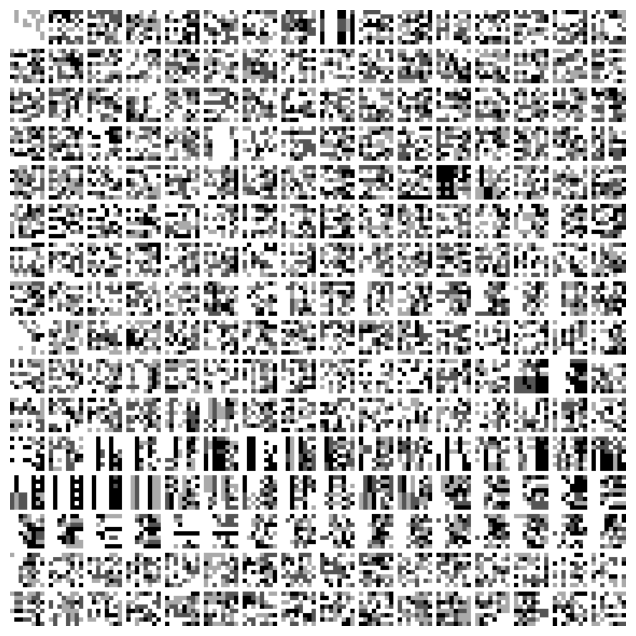

In [71]:
""" Load and check the ROM """

import matplotlib.pyplot as plt
import numpy as np

def load_chr_rom_from_hex(hex_data):
    return np.frombuffer(bytes.fromhex(hex_data), dtype=np.uint8)

chr_rom = load_chr_rom_from_hex(rom_data)

def display_chr_rom(chr_rom):
    num_tiles = 256
    tile_size = 8
    img_size = tile_size * 16 + 15  # Add 15 extra rows for spacing
    img = np.zeros((img_size, img_size), dtype=np.uint8)

    for tile_index in range(num_tiles):
        base_index = tile_index * 16
        tile_data = chr_rom[base_index:base_index + 16].reshape(2, tile_size)
        for y in range(tile_size):
            for x in range(tile_size):
                color_index = ((tile_data[0, y] >> (7 - x)) & 1) | (((tile_data[1, y] >> (7 - x)) & 1) << 1)
                row = (tile_index // 16) * (tile_size + 1) + y  # Add spacing row
                col = (tile_index % 16) * (tile_size + 1) + x  # Add spacing column
                img[row, col] = color_index

    img = np.kron(img, np.ones((8, 8)))  # Double the size by using an 8x8 matrix
    img_inverted = 255 - img
    plt.figure(figsize=(8, 8))
    plt.imshow(img_inverted, cmap='gray')
    plt.axis('off')
    plt.show()

display_chr_rom(chr_rom)


In [72]:
""" Define the NES Graphics class """

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import display, Image
import io

class NESGraphics(object):
    """Class interface for stripping graphics from an NES ROM"""
    def __init__(self, rom_data, offset=2049):
        self.offset = offset
        data = np.unpackbits(np.frombuffer(bytes.fromhex(rom_data), dtype=np.uint8))
        self.data = data.reshape((-1, 8, 8))

    def generate_image(self, A, C=None, transparent=False):
        """Generate an image from the pattern table.

        Parameters
        ----------
        A : array_like
            an array of integers indexing the thumbnails to use.
            The upper-left corner of the image is A[0, 0], and the
            bottom-right corner of the image is A[-1, -1].  A negative index indicates
            that the thumbnail should be flipped horizontally.
        C : array-like
            The color table for A.  C should have shape A.shape + (4,).
            C[i, j] gives the values associated with the four bits of A
            for the output image.
        transparent : array_like
            if true, then zero-values in A will be masked for transparency

        Returns
        -------
        im : ndarray or masked array
             the image encoded by A and C
        """
        A = np.asarray(A, dtype=int)
        if C is None:
            C = np.arange(4)

        # broadcast C to the shape of A
        C = np.asarray(C) + np.zeros(A.shape + (1,))

        im = np.zeros((8 * A.shape[0], 8 * A.shape[1]))
        for i in range(A.shape[0]):
            for j in range(A.shape[1]):
                # extract bits
                ind = 2 * (abs(A[i, j]) + self.offset)
                if ind + 1 >= len(self.data):
                    raise IndexError("Index out of bounds for self.data")
                thumb = self.data[ind] + 2 * self.data[ind + 1]

                # set bit colors
                thumb = C[i, j, thumb]

                # flip image if negative
                if A[i, j] < 0:
                    thumb = thumb[:, ::-1]
                im[8 * i:8 * (i + 1), 8 * j:8 * (j + 1)] = thumb

        if transparent:
            im = np.ma.masked_equal(im, 0)

        return im

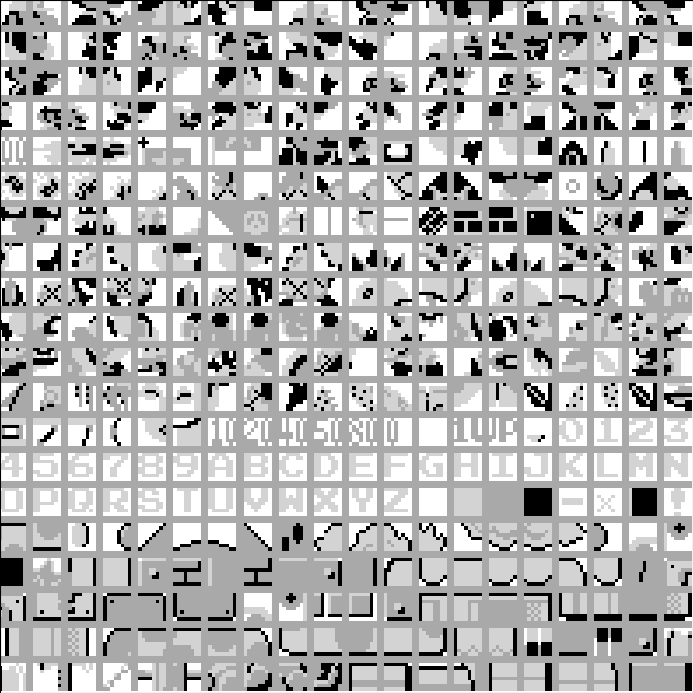

In [73]:
"""Display all graphics in a grid"""
def display_all_graphics(rom_data):
    NG = NESGraphics(rom_data)
    cmap = ListedColormap(['white', 'lightgray', 'darkgray', 'black'])
    
    # Create a grid to hold all graphics with white background and gaps
    grid_size = 20  # Adjust this value based on the number of graphics
    im = np.ones((8 * grid_size + 2 * (grid_size - 1), 8 * grid_size + 2 * (grid_size - 1))) * 2

    for i in range(grid_size):
        for j in range(grid_size):
            ind = 2 * (i * grid_size + j + NG.offset)
            if ind >= len(NG.data) - 1:
                break
            thumb = NG.data[ind] + 2 * NG.data[ind + 1]
            im[10 * i:10 * i + 8, 10 * j:10 * j + 8] = thumb
    
    # Adjust the figure size to match the image size without extra border
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.imshow(im, cmap=cmap, interpolation='nearest', clim=(0, 3))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, im.shape[1])
    ax.set_ylim(im.shape[0], 0)
    
    # Save the figure to a buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    buf.seek(0)
    
    plt.close(fig)
    return buf.getvalue()

# Render the image in Jupyter
image_data = display_all_graphics(rom_data)
display(Image(data=image_data))


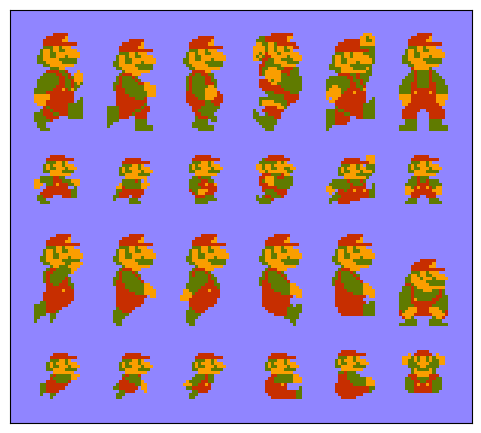

In [80]:
"""Draw a grid of Mario graphics"""
def draw_mario(rom_data):
    NG = NESGraphics(rom_data)
    cmap = ListedColormap([
        rgb_to_hex(nes_palette[int("22", 16)]),
        rgb_to_hex(nes_palette[int("16", 16)]),
        rgb_to_hex(nes_palette[int("27", 16)]),
        rgb_to_hex(nes_palette[int("18", 16)])
    ])
    im = 252 + np.zeros((17, 19), dtype=int)

    # Big Mario row 1
    im[1:5, 1:3] = [[0, 1], [2, 3], [4, 5], [6, 7]]
    im[1:5, 4:6] = [[8, 9], [10, 11], [12, 13], [14, 15]]
    im[1:5, 7:9] = [[16, 17], [18, 19], [20, 21], [22, 23]]
    im[1:5, 10:12] = [[24, 25], [26, 27], [28, 29], [30, 31]]
    im[1:5, 13:15] = [[32, 33], [34, 35], [36, 37], [38, 39]]
    im[1:5, 16:18] = [[0, 1], [76, 77], [74, -74], [75, -75]]

    # Small Mario row 1
    im[9:13, 1:3] = [[8, 9], [40, 41], [42, 43], [44, 45]]
    im[9:13, 4:6] = [[8, 9], [10, 11], [12, 48], [49, 45]]
    im[9:13, 7:9] = [[8, 9], [10, 11], [46, 47], [49, 45]]
    im[9:13, 10:12] = [[8, 9], [10, 11], [12, 48], [92, 93]]
    im[9:13, 13:15] = [[8, 9], [10, 11], [12, 48], [94, 95]]
    im[9:13, 16:18] = [[252, 252], [8, 9], [88, 89], [90, -90]]

    # Big Mario row 2
    im[6:8, 1:3] = [[54, 55], [56, 57]]
    im[6:8, 4:6] = [[50, 51], [52, 53]]
    im[6:8, 7:9] = [[58, 55], [59, 60]]
    im[6:8, 10:12] = [[61, 62], [63, 64]]
    im[6:8, 13:15] = [[50, 65], [66, 67]]
    im[6:8, 16:18] = [[58, 55], [79, -79]]

    # Small Mario row 2
    im[14:16, 1:3] = [[50, 51], [68, 69]]
    im[14:16, 4:6] = [[50, 51], [70, 71]]
    im[14:16, 7:9] = [[50, 51], [72, 73]]
    im[14:16, 10:12] = [[50, 51], [144, 145]]
    im[14:16, 13:15] = [[58, 55], [146, 147]]
    im[14:16, 16:18] = [[158, -158], [159, -159]]

    im = NG.generate_image(im)
    
    fig, ax = plt.subplots(figsize=(6, 6 * 17. / 19.))
    ax.imshow(im, cmap=cmap, interpolation='nearest', clim=(0, 3))

    ax.set_xticks([])
    ax.set_yticks([])
    
    # Save the figure to a buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0.1)
    buf.seek(0)
    
    plt.close(fig)
    return buf.getvalue()

# Render the image in Jupyter
image_data = draw_mario(rom_data)
display(Image(data=image_data))



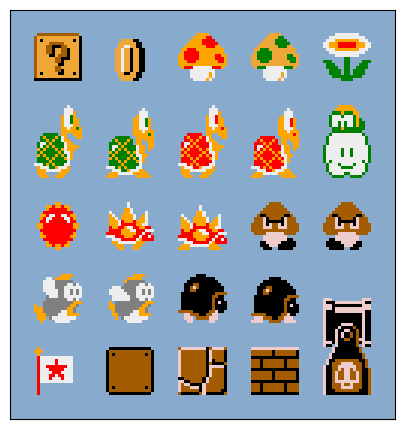

In [100]:
"""Draw various Mario graphics"""
def draw_graphics(rom_data):
    NG = NESGraphics(rom_data)
    cmap = ListedColormap(['#88AACC', 'black', '#EECCCC', '#a45c03',
                           'green', 'orange', 'red', '#eea636',
                           '#EEEEEE', 'gray'])
    
    im = 252 + np.zeros((17, 16))
    colors = np.zeros((17, 16, 4))

    # question block
    im[1:3, 1:3] = [[339, 340], [341, 342]]
    colors[1:3, 1:3] = [0, 7, 3, 1]

    # coin
    im[1:3, 4:6] = [[421, 422], [423, 424]]
    colors[1:3, 4:6] = [0, 7, 8, 1]

    # mushroom
    im[1:3, 7:9] = [[118, 119], [120, 121]]
    colors[1:3, 7:9] = [0, 6, 8, 5]

    # 1-up mushroom
    im[1:3, 10:12] = [[118, 119], [120, 121]]
    colors[1:3, 10:12] = [0, 4, 8, 7]

    # fire flower
    im[1:3, 13:15] = [[214, -214], [217, -217]]
    colors[1, 13:15] = [0, 6, 8, 5]
    colors[2, 13:15] = [0, 4, 4, 4]

    # green koopa-troopa
    im[4:7, 1:3] = [[252, 160], [161, 162], [163, 164]]
    im[4:7, 4:6] = [[252, 165], [166, 167], [168, 169]]
    colors[4:7, 1:6] = [0, 4, 8, 5]

    # red koopa-troopa
    im[4:7, 7:9] = [[252, 160], [161, 162], [163, 164]]
    im[4:7, 10:12] = [[252, 165], [166, 167], [168, 169]]
    colors[4:7, 7:12] = [0, 6, 8, 5]

    # cloud turtle
    im[4:7, 13:15] = [[185, 184], [432, 434], [433, 435]]
    colors[4, 13:15] = [0, 4, 8, 5]
    colors[5:7, 13:15] = [0, 8, 8, 4]

    # spiny
    im[8:10, 1:3] = [[148, -148], [149, -149]]
    im[8:10, 4:6] = [[150, 151], [152, 153]]
    im[8:10, 7:9] = [[154, 155], [156, 157]]
    colors[8:10, 1:9] = [0, 6, 8, 5]

    # Goombas
    im[8:10, 10:12] = [[112, 113], [114, 115]]
    im[8:10, 13:15] = [[112, 113], [-115, -114]]
    colors[8:10, 10:15] = [0, 1, 2, 3]

    # fish
    im[11:13, 1:3] = [[178, 179], [180, 181]]
    im[11:13, 4:6] = [[182, 179], [183, 181]]
    colors[11:13, 1:6] = [0, 9, 8, 5]

    # beetle
    im[11:13, 7:9] = [[170, 171], [172, 173]]
    im[11:13, 10:12] = [[174, 175], [176, 177]]
    colors[11:13, 7:12] = [0, 1, 2, 3]

    # flag
    im[14:16, 1:3] = [[84, 85], [86, 87]]
    colors[14:16, 1:3] = [0, 6, 8, 5]

    # brown block
    im[14:16, 4:6] = [[343, 344], [345, 346]]
    colors[14:16, 4:6] = [0, 7, 3, 1]

    # brown block 2
    im[14:16, 7:9] = [[436, 437], [438,439]]
    colors[14:16, 7:9] = [0, 2, 3, 1]

    # bricks
    im[14:16, 10:12] = [[325, 325], [327, 327]]
    colors[14:16, 10:12] = [0, 2, 3, 1]

    # cannon
    im[12:16, 13:15] = [[454, 455], [456, 457], [458, 459], [460, 461]]
    colors[12:16, 13:15] = [0, 2, 3, 1]
    
    im = NG.generate_image(im, colors)
    
    fig, ax = plt.subplots(figsize=(5, 5 * 17. / 16.))
    ax.imshow(im, cmap=cmap, interpolation='nearest', clim=(0, 9))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Save the figure to a buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0.1)
    buf.seek(0)
    
    plt.close(fig)
    return buf.getvalue()

# Render the image in Jupyter
image_data = draw_graphics(rom_data)
display(Image(data=image_data))


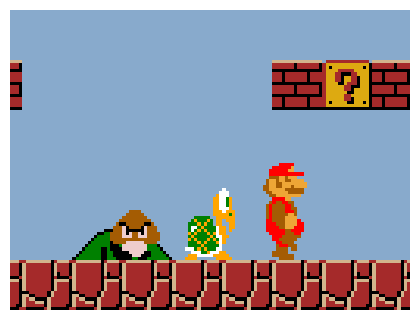

In [102]:
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import animation
from IPython.display import HTML

class NESAnimator():
    """Class for animating NES graphics"""
    def __init__(self, framesize, figsize=(8, 6), offset=2049):
        self.NG = NESGraphics(rom_data)
        self.figsize = figsize
        self.framesize = framesize
        self.frames = defaultdict(lambda: [])
        self.ims = {}

    def add_frame(self, key, A, C=None, ctable=None,
                  offset=(0, 0), transparent=True):
        """add a frame to the animation.
        A & C are passed to NESGraphics.generate_image"""
        cmap = ListedColormap(ctable)
        im = self.NG.generate_image(A, C, transparent=transparent)
        self.frames[key].append((im, cmap, offset))

    def _initialize(self):
        """initialize animation"""
        A = np.ma.masked_equal(np.zeros((2, 2)), 0)
        for i, key in enumerate(sorted(self.frames.keys())):
            self.ims[key] = self.ax.imshow(A, interpolation='nearest',
                                           zorder=i + 1)
        self.ax.set_xlim(0, self.framesize[1])
        self.ax.set_ylim(0, self.framesize[0])

        return tuple(self.ims[key] for key in sorted(self.ims.keys()))

    def _animate(self, i):
        """animation step"""
        for key in sorted(self.frames.keys()):
            im, cmap, offset = self.frames[key][i % len(self.frames[key])]

            self.ims[key].set_data(im)
            self.ims[key].set_cmap(cmap)
            self.ims[key].set_clim(0, len(cmap.colors) - 1)
            self.ims[key].set_extent((offset[1],
                                      im.shape[1] / 8 + offset[1],
                                      offset[0],
                                      im.shape[0] / 8 + offset[0]))

        return tuple(self.ims[key] for key in sorted(self.ims.keys()))

    def animate(self, interval, frames, blit=True):
        """animate the frames"""
        self.fig = plt.figure(figsize=self.figsize)
        self.ax = self.fig.add_axes([0, 0, 1, 1], frameon=False,
                                    xticks=[], yticks=[])
        self.ax.xaxis.set_major_formatter(plt.NullFormatter())
        self.ax.yaxis.set_major_formatter(plt.NullFormatter())
        self.anim = animation.FuncAnimation(self.fig,
                                            self._animate,
                                            init_func=self._initialize,
                                            frames=frames, interval=interval,
                                            blit=blit)
        self.fig.anim = self.anim
        return self.anim


def animate_mario():
    NA = NESAnimator(framesize=(12, 16), figsize=(4, 3))

    # Set up the background frames
    bg = np.zeros((12, 18), dtype=int)
    bg_colors = np.arange(4) + np.zeros((12, 18, 4))
    bg_ctable = ['#88AACC', 'tan', '#a45c03', 'black',
                 'green', '#DDAA11', '#FFCC00']
     
    # blue sky
    bg.fill(292)

    # brown bricks on the ground
    bg[10] = 9 * [436, 437]
    bg[11] = 9 * [438, 439]

    # little green hill 
    bg[8, 3:5] = [305, 306]
    bg[9, 2:6] = [304, 308, 294, 307]
    bg_colors[8, 3:5] = [0, 1, 4, 3]
    bg_colors[9, 2:6] = [0, 1, 4, 3]

    # brown bricks
    bg[2, 10:18] = 325
    bg[3, 10:18] = 327

    # gold question block
    bg[2, 12:14] = [339, 340]
    bg[3, 12:14] = [341, 342]
    bg_colors[2:4, 12:14] = [0, 6, 2, 3]
    
    # duplicate background for clean wrapping
    bg = np.hstack([bg, bg])
    bg_colors = np.hstack([bg_colors, bg_colors])

    # get index of yellow pixels to make them flash
    i_yellow = np.where(bg_colors == 6)

    # create background frames by offsetting the image
    for offset in range(36):
        bg_colors[i_yellow] = [6, 6, 6, 6, 5, 5, 2, 5, 5][offset % 9]
        NA.add_frame('bg', bg, bg_colors, bg_ctable,
                     offset=(0, -0.5 * offset),
                     transparent=False)

    # Create mario frames
    mario_colors = ['white', 'red', '#eea636', '#a45c03']
    NA.add_frame('mario', [[0, 1], [2, 3], [4, 5], [6, 7]],
                 ctable=mario_colors, offset=(2, 10))
    NA.add_frame('mario', [[8, 9], [10, 11], [12, 13], [14, 15]],
                 ctable=mario_colors, offset=(2, 10))
    NA.add_frame('mario', [[16, 17], [18, 19], [20, 21], [22, 23]],
                 ctable=mario_colors, offset=(2, 10))

    # Create koopa-troopa frames
    troopa_colors = ['white', 'green', 'white', 'orange']
    NA.add_frame('troopa', [[252, 160], [161, 162], [163, 164]],
                 ctable=troopa_colors, offset=(2, 7))
    NA.add_frame('troopa', [[252, 165], [166, 167], [168, 169]],
                 ctable=troopa_colors, offset=(2, 7))

    # Create goomba frames
    goomba_colors = ['white', 'black', '#EECCCC', '#a45c03']
    NA.add_frame('goomba', [[112, 113], [114, 115]],
                 ctable=goomba_colors, offset=(2, 4))
    NA.add_frame('goomba', [[112, 113], [-115, -114]],
                 ctable=goomba_colors, offset=(2, 4))

    return NA.animate(interval=100, frames=36)

# Generate the animation
anim = animate_mario()

# Display the animation in Jupyter
HTML(anim.to_jshtml())

